# **Abstract**

In this notebook, we will take an initial look at the Home Credit default risk machine learning project. The objective of this project is to use historical loan application data to predict whether or not an applicant will be able to repay a loan. This is a standard supervised classification task:

* Supervised: The labels are included in the training data and the goal is to train a model to learn to predict the labels from the features
* Classification: The label is a binary variable, 0 (will repay loan on time), 1 (will have difficulty repaying loan)

# **Table of Contents**

1.   Abstract

2.   Table of contents

2.   Bibliography

3.   Contexte

4.   Crisp : Cross-industry standard process for data mining

    4.1. Business Understanding 
     
       1.1. Business Understanding Overview 

       1.2. Determining Business Objectives 

       1.3. Assessing the Situation

       1.4. Determining Data Mining Goals

       1.5. Producing a Project Plan

    4.2. Data Understanding :

        2.1. Collecting Initial Data

    4.3. Data Preparation







# **Bibliography**

. Consignes : https://openclassrooms.com/fr/paths/164/projects/632/assignment

. Données : https://www.kaggle.com/c/home-credit-default-risk/data

. Hyperparameters : https://machinelearningmastery.com/difference-between-a-parameter-and-a-hyperparameter/

. Dashboard : https://towardsdatascience.com/dash-for-beginners-create-interactive-python-dashboards-338bfcb6ffa4

. SMOTE : https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

. Random Search : https://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf

# **Contexte**



The company "Prêt à dipenser" wants to implement a “credit scoring” tool to calculate the probability that a customer will repay their credit, then classify the request as granted or refused credit. She therefore wishes to develop a classification algorithm based on various data sources (behavioral data, data from other financial institutions, etc.).

In addition, customer relationship managers have reported that customers are increasingly demanding transparency in credit granting decisions. This customer demand for transparency is completely in line with the values ​​that the company wants to embody.

Ready to spend therefore decides to develop an interactive dashboard so that customer relationship managers can both explain credit granting decisions as transparently as possible, but also allow their customers to access their personal information and explore them easily.



# **Crisp: Cross-industry standard process for data mining**

CRISP-DM, which stands for Cross-Industry Standard Process for Data Mining,is an industry-proven way to guide your data mining efforts.

. As a methodology, it includes descriptions of the typical phases of a 
project, the tasks involved with each phase, and an explanation of the 
relationships between these tasks.

. As a process model, CRISP-DM provides an overview of the data mining life cycle.

# **1. Business Understanding**

### 1.1. **Determining Business Objectives**

**Describe Problem Area**

"Prêt à dipenser" company wants to implement a “credit scoring” tool to calculate the probability that a customer will repay their credit, then classify the request as granted or refused credit. 

**Defining Business Objectives**

. Build a scoring model that will automatically predict a client's bankruptcy probability.

. Build an interactive dashboard for customer relationship managers to interpret the predictions made by the model, and improve the customer knowledge of customer relationship managers.
THE DASHBORD SHOULD :
* Allow to visualize the score and the interpretation of this score for each customer in an intelligible way for a person not expert in data science.
* Allow to view descriptive information relating to a customer (via a filter system).
* Allow descriptive information relating to a customer to be compared to all customers or to a group of similar customers.
### **1.3. Assessing the Situation**

**Data**

The data is provided by Home Credit, a service dedicated to provided lines of credit (loans) to the unbanked population.

There are 7 different sources of data:

* application_train/application_test: the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating 0: the loan was repaid or 1: the loan was not repaid.
* bureau: data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* bureau_balance: monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* previous_application: previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* POS_CASH_BALANCE: monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* installments_payment: payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.
This diagram shows how all of the data is related:

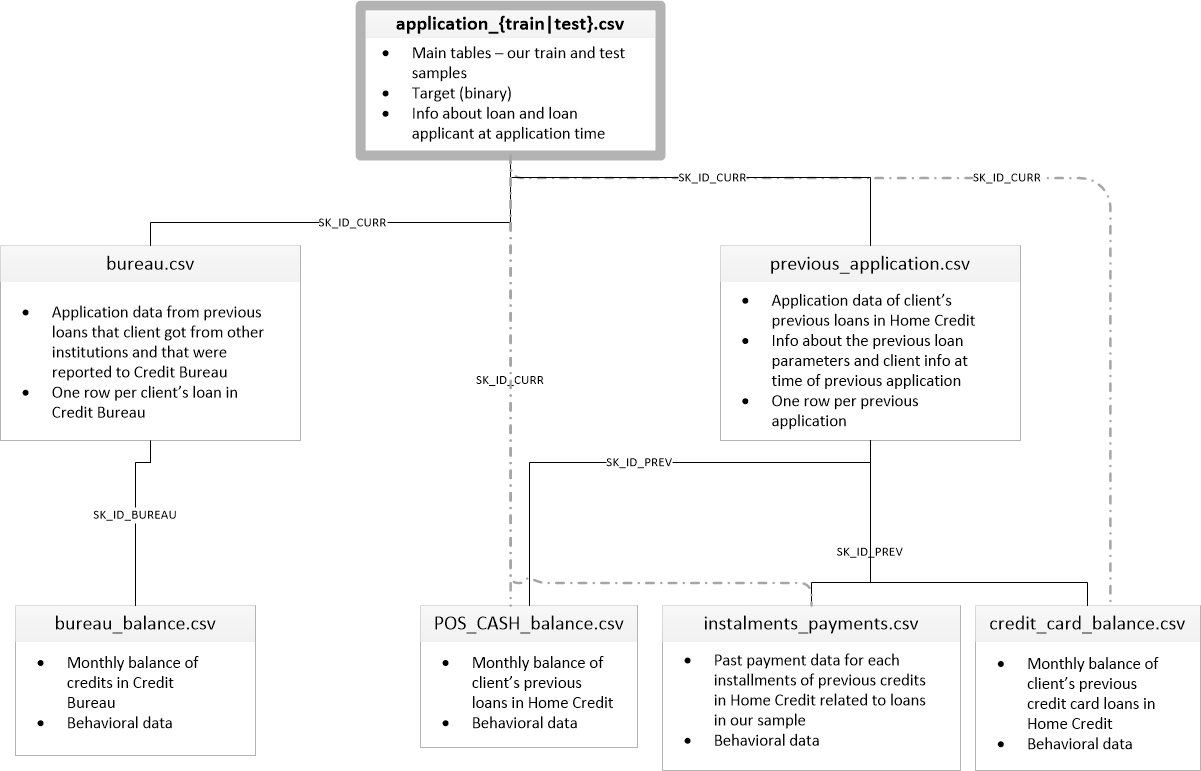

Moreover, we are provided with the definitions of all the columns (in HomeCredit_columns_description.csv) and an example of the expected submission file.

**Risks and Contingencies**

It is also wise to consider possible risks over the course of the 
project. Types of risks include:

* Scheduling (What if the project takes longer than anticipated?)
The scope of the project should be reduced.

* Data (What if the data are of poor quality or coverage?)
We have to analyze the database well and determine by feature 
engineering the best possible features, otherwise look for other data 
of better quality and high coverage.

* Results (What if the initial results are less dramatic than expected?)
In this case we have to look for the problem and try other tracks

**Terminology**

* Exploratory Data Analysis (EDA) : is an open-ended process where we calculate statistics and make figures to find trends, anomalies, patterns, or relationships within the data. The goal of EDA is to learn what our data can tell us. It generally starts out with a high level overview, then narrows in to specific areas as we find intriguing areas of the data. The findings may be interesting in their own right, or they can be used to inform our modeling choices, such as by helping us decide which features to use.

* The target is what we are asked to predict: either a 0 for the loan was repaid on time, or a 1 indicating the client had payment difficulties. We can first examine the number of loans falling into each category.

### **1.4. Determining Data Mining Goals** 

**Data Mining Goals**

1. Build a scoring model that will automatically predict a client's bankruptcy probability.

2. Build an interactive dashboard for customer relationship managers to interpret the predictions made by the model, and improve the customer knowledge of customer relationship managers.

**Data Mining Success Criteria**

Metric: ROC AUC : The Area Under the Curve (AUC) explains itself by its name! It is simply the area under the ROC curve. (This is the integral of the curve.) This metric is between 0 and 1 with a better model scoring higher. A model that simply guesses at random will have an ROC AUC of 0.5.

When we measure a classifier according to the ROC AUC, we do not generation 0 or 1 predictions, but rather a probability between 0 and 1. This may be confusing because we usually like to think in terms of accuracy, but when we get into problems with inbalanced classes (we will see this is the case), accuracy is not the best metric. For example, if I wanted to build a model that could detect terrorists with 99.9999% accuracy, I would simply make a model that predicted every single person was not a terrorist. Clearly, this would not be effective (the recall would be zero) and we use more advanced metrics such as ROC AUC or the F1 score to more accurately reflect the performance of a classifier. A model with a high ROC AUC will also have a high accuracy, but the ROC AUC is a better representation of model performance.


Two aspects of good APIs are usability and maintainability.

### **1.5. Producing a Project Plan**

**Project Plan**

Phase                 : Time       : Resources          : Risks

Business understanding: 3 days     : Home Credit's
                                    data                : Economic 
                                                           change

Data understanding    : 4 days     : Home Credit's 
                                    data                : Data problems,
                                                          technology 
                                                          problems

Data preparation      : 2 weeks    : Home Credit's 
                                    data
                                                        : Data problems,
                                                          technology 
                                                          problems


Modeling              : 3 weeks     : Home Credit's 
                                    data
                                                         : Technology 
                                                           problems
                                                           models

Evaluation            : 2 weeks    : Home Credit's 
                                    data                 : Economic     
                                                           change,
                                                          inability to                                                                 implement results   

 
## **2. Data Understanding** 

### **2.1. Collecting Initial Data**

**Data Collection Report**

The company provides a database containing information on
* Static data for all applications
* All client's previous credits provided by other financial institutions 
* Monthly balances of previous credits in Credit Bureau
* Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit
* Monthly balance snapshots of previous credit cards that the applicant has with Home Credit
* All previous applications for Home Credit loans of clients who have loans in our sample
* Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample

We can use this data to derive other variables that can be very 
interesting in our model.



# **1. Librairies and dataframe's Import**

In [ ]:
# Common libraries for ML
import os
from os import listdir
import time
import scipy.stats
from pylab import figure, text, scatter, show
import re

# Size reduction 
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

# Memory management
import gc 

# Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder


First, we can list all the available data files. There are a total of 9 files: 1 main file for training (with target) 1 main file for testing (without the target), 1 example submission file, and 6 other files containing additional information about each loan.

In [ ]:
print(os.listdir("/content/drive/MyDrive/Projet 7"))

['Projet+Mise+en+prod+-+home-credit-default-risk.zip', 'application_test.csv', 'application_train.csv', 'bureau.csv', 'HomeCredit_columns_description.csv', 'sample_submission.csv', 'credit_card_balance.csv', 'POS_CASH_balance.csv', 'installments_payments.csv', 'bureau_balance.csv', 'previous_application.csv', 'df_P7.csv']


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Projet 7/application_train.csv',
                    low_memory=False)
test = pd.read_csv('/content/drive/MyDrive/Projet 7/application_test.csv',
                   low_memory=False)

bureau = pd.read_csv('/content/drive/MyDrive/Projet 7/bureau.csv',
                     low_memory=False)

bureau_balance = pd.read_csv('/content/drive/MyDrive/Projet 7/\
bureau_balance.csv', low_memory=False)

credit_card = pd.read_csv('/content/drive/MyDrive/Projet 7/\
credit_card_balance.csv', low_memory=False)

cash = pd.read_csv('/content/drive/MyDrive/Projet 7/POS_CASH_balance.csv', 
                   low_memory=False)

with open('/content/drive/MyDrive/Projet 7/HomeCredit_columns_description.csv',
          'rb')as f:
  description = f.read()

installments = pd.read_csv('/content/drive/MyDrive/Projet 7/\
installments_payments.csv', low_memory=False)

previous = pd.read_csv('/content/drive/MyDrive/Projet 7/\
previous_application.csv', low_memory=False)


# **2. Exploratory Data Analysis** 

In [ ]:
def overview(dataframe):
    """This function will return the overview of the dataframe"""
    
    print("Shape of the dataframe is: {}".format(dataframe.shape))
    print("**"*30)
    print("Information about features: ",dataframe.info())
    print("**"*30)
    print("Total number of null values: \n ",dataframe.isnull().sum())
    print("**"*30)
    print(100*'__')
    msno.bar(dataframe, color='cyan')
    
    return dataframe.head(2)

**2.1. Exploration of train data**

Shape of the dataframe is: (307511, 122)
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
Information about features:  None
************************************************************
Total number of null values: 
  SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64
************************************************************
________________________________________________________________________________

SK_ID_CURR  TARGET  ... AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR
0      100002       1  ...                       0.0                        1.0
1      100003       0  ...                       0.0                        0.0

[2 rows x 122 columns]

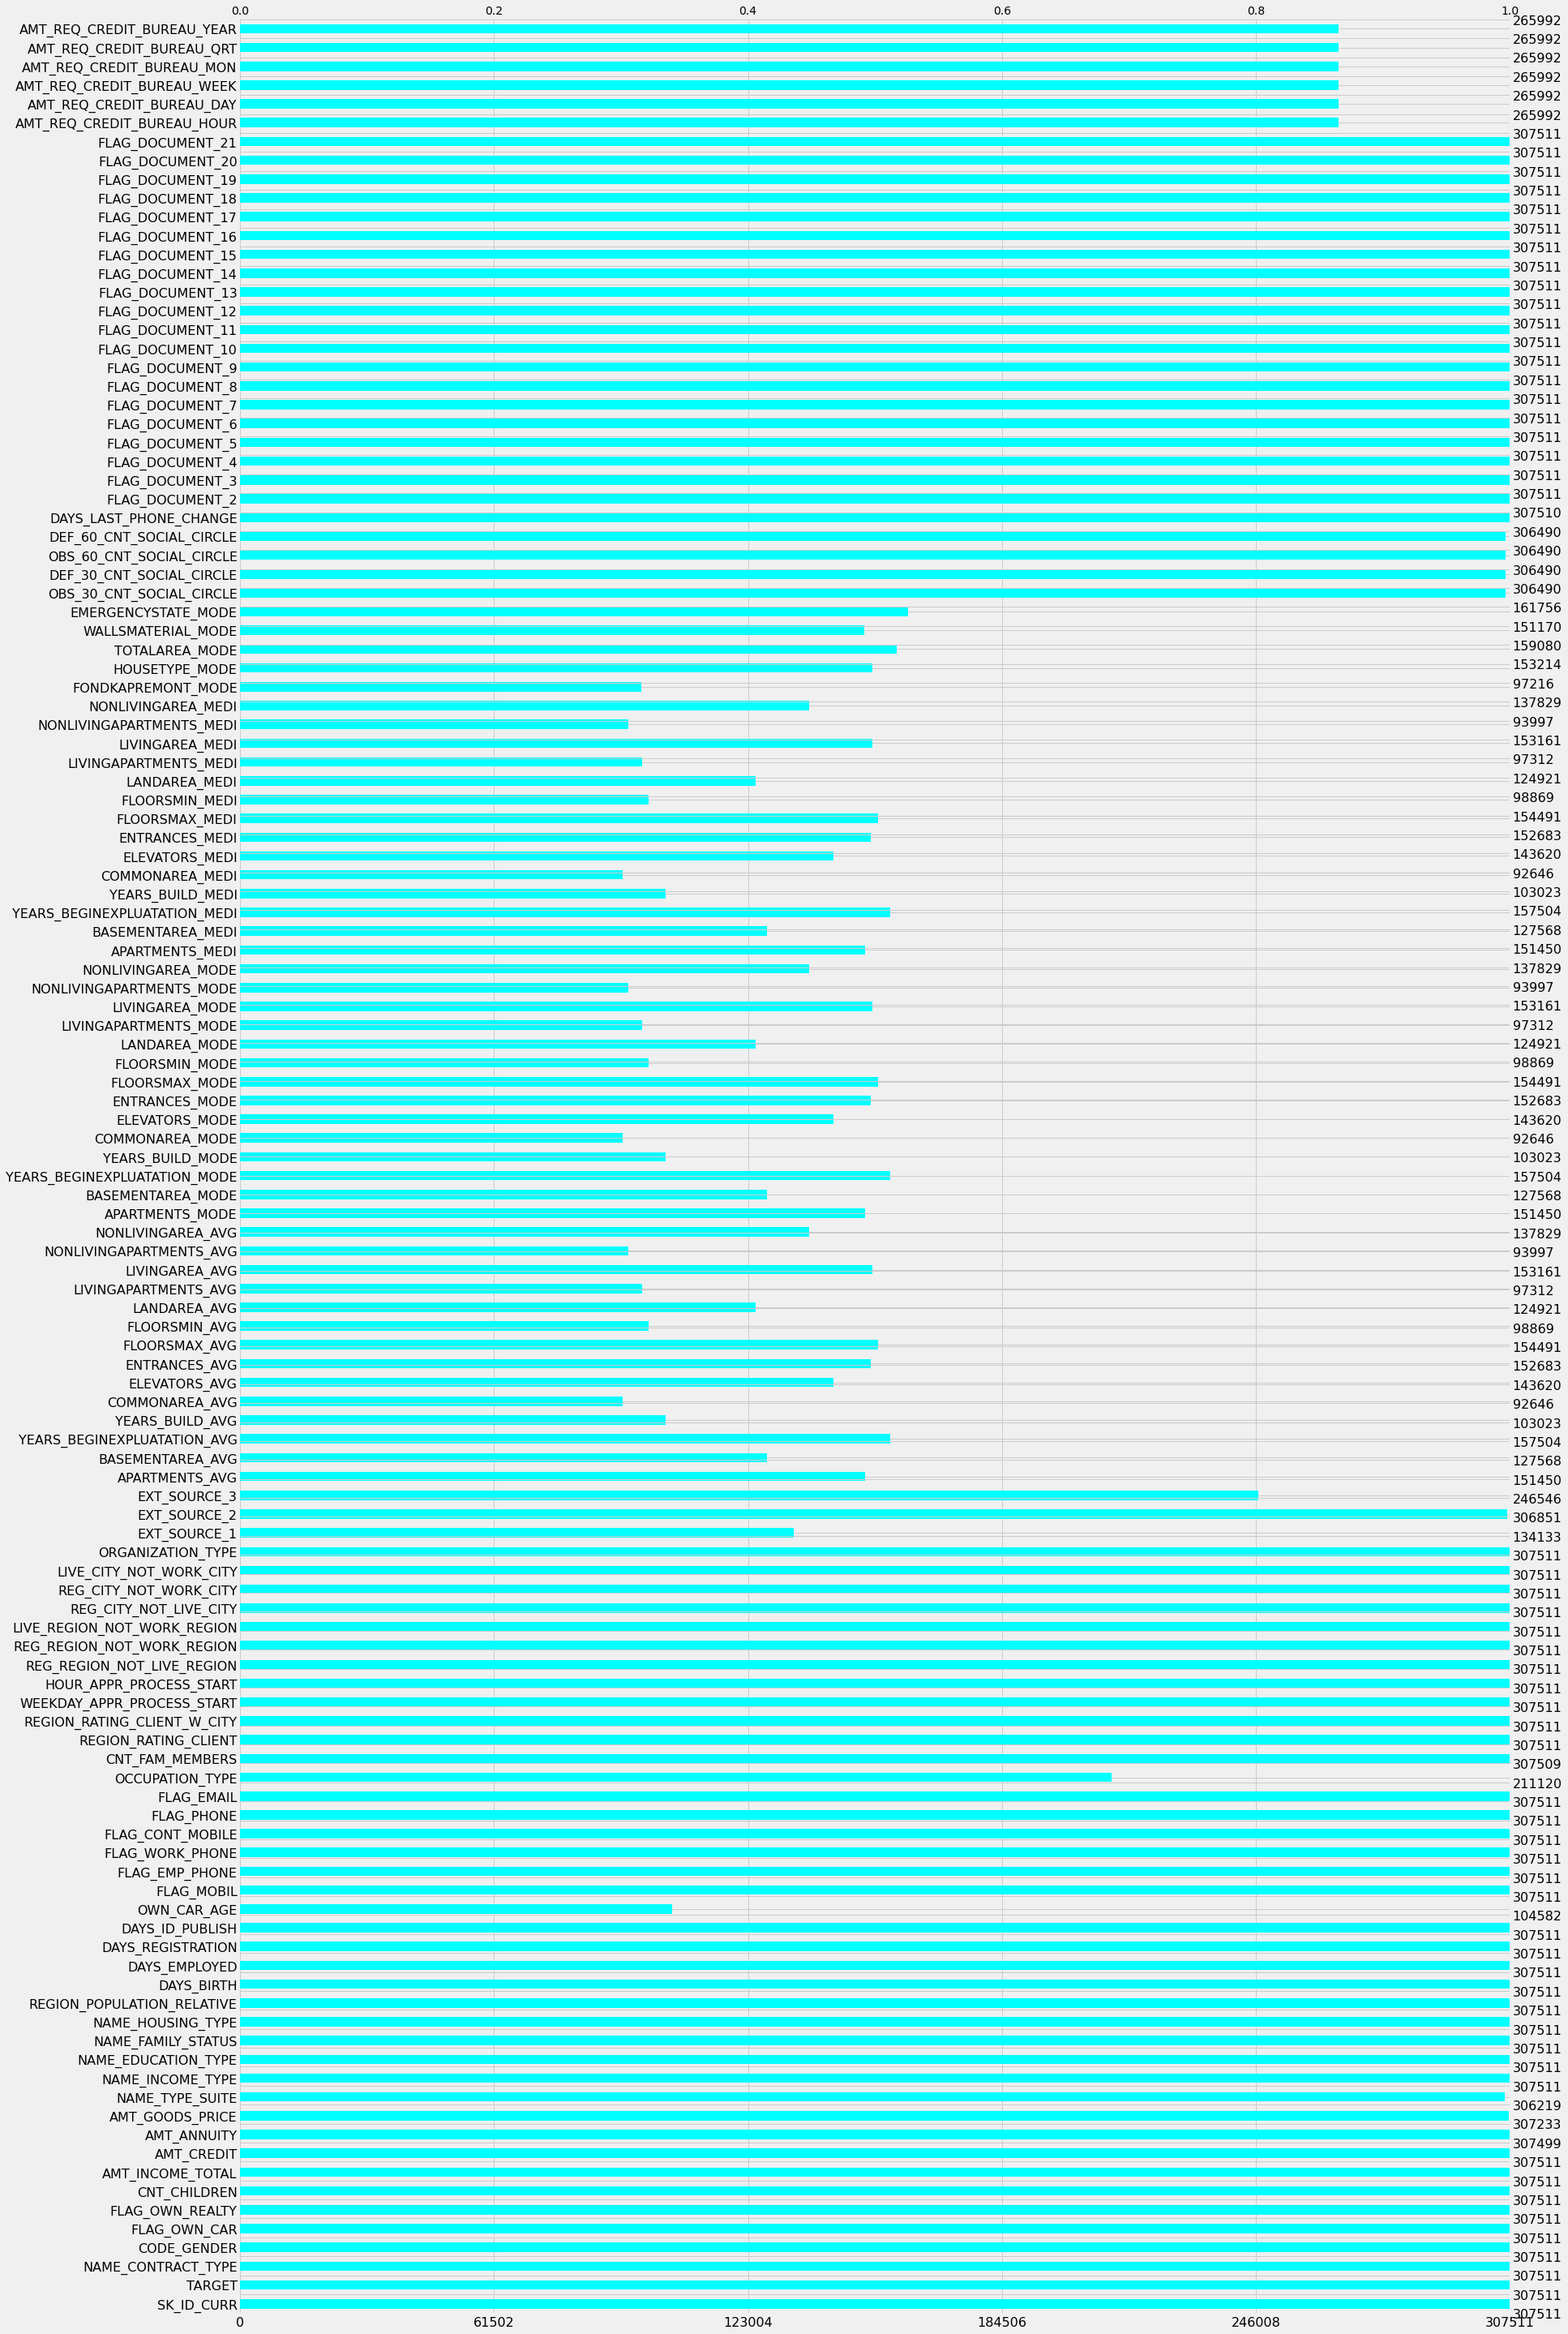

In [ ]:
overview(train)

The training data has 307511 observations (each one a separate loan) and 122 features (variables) including the TARGET (the label we want to predict).  

The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.

**2.2. Distribution of Target Variable**

The target is what we are asked to predict: either a 0 for the loan was repaid on time, or a 1 indicating the client had payment difficulties. We can first examine the number of loans falling into each category.

In [ ]:
train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [ ]:
train['TARGET'].astype(int).plot.hist()

The target variable is slightly imbalance with the majority of loans has the target equals to 0 which indicates that individuals did not had any problems in paying installments in given time. There are about 91% loans which is equal to about 282K with target = 0, While only 9% of the total loans (about 24K applicants) in this dataset involved the applicants having problems in repaying the loan / making installments.

From this information, we see this is an imbalanced class problem. There are far more loans that were repaid on time than loans that were not repaid. Once we get into more sophisticated machine learning models, we can weight the classes by their representation in the data to reflect this imbalance.

**2.3. Gender Type of Applicants** 

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

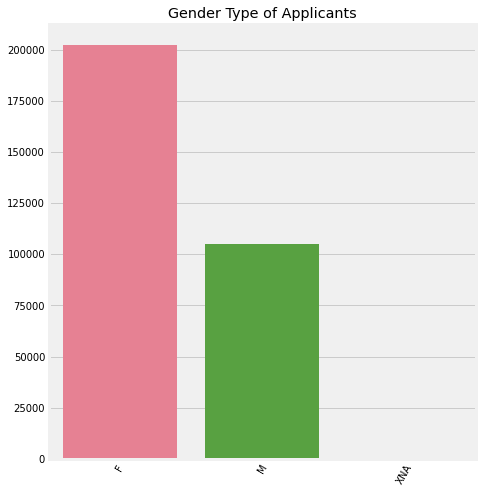

In [ ]:
fig = plt.figure(1, figsize=(15, 8))
gender = train["CODE_GENDER"].value_counts()
plt.title("Gender Type of Applicants")
sns.set_palette(sns.color_palette("husl", len(gender)))

# Barplot
plt.subplot(1, 2, 1)
plt.title("Gender Type of Applicants")

sns.barplot(gender.index, gender.values, orient="v")
plt.xticks(rotation=60)

In the applicant's data women have applied for a larger majority of loans which is almost the double as the men. In total, there are about 202,448 loan applications filed by females in contrast to about 105,059 applications filed by males. However, a larger percentage (about 10% of the total) of men had the problems in paying the loan or making installments within time as compared to women applicants (about 7%)

**2.4. Family Status of Applicants** 

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

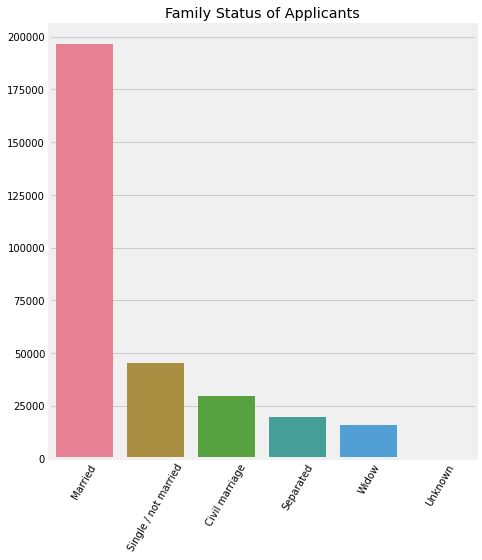

In [ ]:
fig = plt.figure(1, figsize=(15, 8))
status = train["NAME_FAMILY_STATUS"].value_counts()
plt.title("Family Status of Applicants")

sns.set_palette(sns.color_palette("husl", len(status)))

# Barplot
plt.subplot(1, 2, 1)
plt.title("Family Status of Applicants")

sns.barplot(status.index, status.values, orient="v")
plt.xticks(rotation=60)

Married people have applied for a larger number of loan applications about 196K, However, people having Civil Marriage has the highest percentage (about 10%) of loan problems and challenges.

**2.5. Does applicants own Real Estate or Car ?**

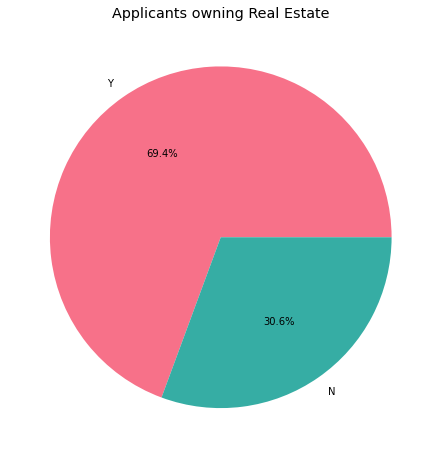

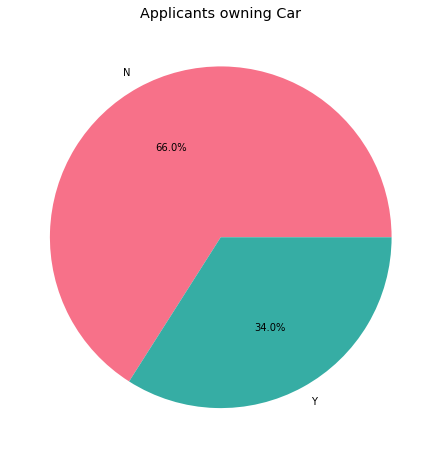

In [ ]:
fig = plt.figure(1, figsize=(15, 8))
reality = train["FLAG_OWN_REALTY"].value_counts()

sns.set_palette(sns.color_palette("husl", len(reality)))

# Pieplot
plt.subplot(1, 2, 1)
plt.title("Applicants owning Real Estate")
            
plt.pie(reality, labels=list(reality.index), autopct='%1.1f%%')
plt.show()


fig = plt.figure(1, figsize=(15, 8))
Car = train["FLAG_OWN_CAR"].value_counts()
plt.title("Applicants owning Car")

sns.set_palette(sns.color_palette("husl", len(Car)))

# Pieplot
plt.subplot(1, 2, 1)
plt.title("Applicants owning Car")
            
plt.pie(Car, labels=list(Car.index), autopct='%1.1f%%')
plt.show()

About 70% of the applicants own Real Estate, while only 34% of applicants own Car who had applied for the loan in the past years. However, a higher percentage of people having payment difficulties was observed with applicants which did not owned Car or which did not owned Real Estate.

**2.6. Suite Type and Income Type of Applicants** 

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

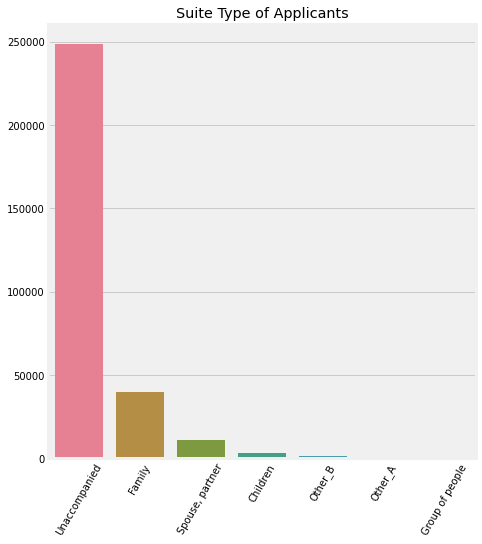

In [ ]:
fig = plt.figure(1, figsize=(15, 8))
Type = train["NAME_TYPE_SUITE"].value_counts()
plt.title("Suite Type of Applicants")

sns.set_palette(sns.color_palette("husl", len(Type)))


# Barplot
plt.subplot(1, 2, 1)
plt.title("Suite Type of Applicants")

sns.barplot(Type.index, Type.values, orient="v")
plt.xticks(rotation=60)

fig = plt.figure(2, figsize=(15, 8))
Income = train["NAME_INCOME_TYPE"].value_counts()
plt.title("Income Type of Applicants")

sns.set_palette(sns.color_palette("husl", len(Income)))

# Barplot
plt.subplot(1, 2, 1)
plt.title("Income Type of Applicants")

sns.barplot(Income.index, Income.values, orient="v")
plt.xticks(rotation=60)

Top 3 Type Suites which applies for loan are the houses which are:

- Unaccompanined (about 248K applicants) 
- Family (about 40K applicants)  
- Spouse, partner (about 11K applicants)    

The income type of people who applies for loan include about 8 categroes, top ones are :

- Working Class (158K)
- Commercial Associate (71K)
- Pensiner (55K)

**2.6. Applicant's Contract Type**

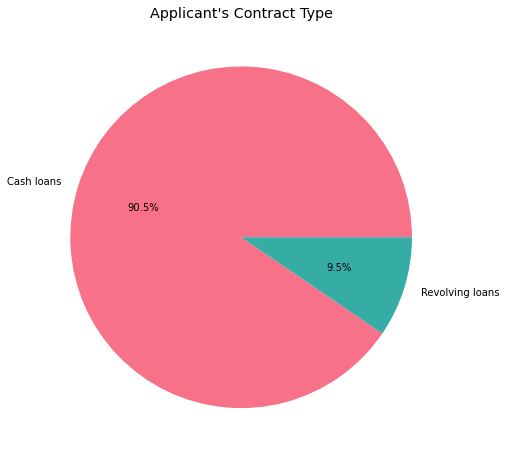

In [ ]:
fig = plt.figure(1, figsize=(15, 8))
reality = train["NAME_CONTRACT_TYPE"].value_counts()

sns.set_palette(sns.color_palette("husl", len(reality)))

# Pieplot
plt.subplot(1, 2, 1)
plt.title("Applicant's Contract Type")
            
plt.pie(reality, labels=list(reality.index), autopct='%1.1f%%')
plt.show()

Cash loans with about 278K loans contributes to a majorty of total lonas in this dataset. Revolving loans has significantly lesser number equal to about 29K as compared to Cash loans.

**2.7. Education Type and Housing Type**

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

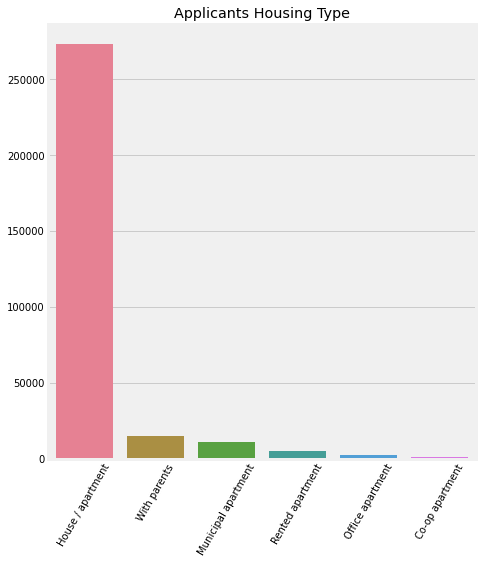

In [ ]:
fig = plt.figure(1, figsize=(15, 8))
Type = train["NAME_EDUCATION_TYPE"].value_counts()

sns.set_palette(sns.color_palette("husl", len(Type)))


# Barplot
plt.subplot(1, 2, 1)
plt.title("Applicants Education Type")

sns.barplot(Type.index, Type.values, orient="v")
plt.xticks(rotation=60)

fig = plt.figure(2, figsize=(15, 8))
Income = train["NAME_HOUSING_TYPE"].value_counts()
plt.title("Applicants Housing Type")

sns.set_palette(sns.color_palette("husl", len(Income)))

# Barplot
plt.subplot(1, 2, 1)
plt.title("Applicants Housing Type")

sns.barplot(Income.index, Income.values, orient="v")
plt.xticks(rotation=60)

**2.8. Examine Missing Values**

Next we can look at the number and percentage of missing values in each column.

In [ ]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
# Missing values statistics
missing_values = missing_values_table(train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


Missing Values  % of Total Values
COMMONAREA_MEDI                   214865               69.9
COMMONAREA_AVG                    214865               69.9
COMMONAREA_MODE                   214865               69.9
NONLIVINGAPARTMENTS_MEDI          213514               69.4
NONLIVINGAPARTMENTS_MODE          213514               69.4
NONLIVINGAPARTMENTS_AVG           213514               69.4
FONDKAPREMONT_MODE                210295               68.4
LIVINGAPARTMENTS_MODE             210199               68.4
LIVINGAPARTMENTS_MEDI             210199               68.4
LIVINGAPARTMENTS_AVG              210199               68.4
FLOORSMIN_MODE                    208642               67.8
FLOORSMIN_MEDI                    208642               67.8
FLOORSMIN_AVG                     208642               67.8
YEARS_BUILD_MODE                  204488               66.5
YEARS_BUILD_MEDI                  204488               66.5
YEARS_BUILD_AVG                   204488               66.5
OWN_CAR_AGE                       202929               66.0
LANDAREA_AVG                      182590               59.4
LANDAREA_MEDI                     182590               59.4
LANDAREA_MODE                     182590               59.4

When it comes time to build our machine learning models, we will have to fill in these missing values (known as imputation). In later work, we will use models such as XGBoost that can handle missing values with no need for imputation. Another option would be to drop columns with a high percentage of missing values, although it is impossible to know ahead of time if these columns will be helpful to our model. Therefore, we will keep all of the columns for now.

**2.9. Anomalies**

One problem we always want to be on the lookout for when doing EDA is anomalies within the data. These may be due to mis-typed numbers, errors in measuring equipment, or they could be valid but extreme measurements. One way to support anomalies quantitatively is by looking at the statistics of a column using the describe method. The numbers in the DAYS_BIRTH column are negative because they are recorded relative to the current loan application. To see these stats in years, we can mutliple by -1 and divide by the number of days in a year:

In [ ]:
(train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean          0.120375
std           0.032757
min           0.056213
25%           0.093173
50%           0.118221
75%           0.147735
max           0.189371
Name: DAYS_BIRTH, dtype: float64

Those ages look reasonable. There are no outliers for the age on either the high or low end. How about the days of employment?

In [ ]:
train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

That doesn't look right! The maximum value (besides being positive) is about 1000 years!

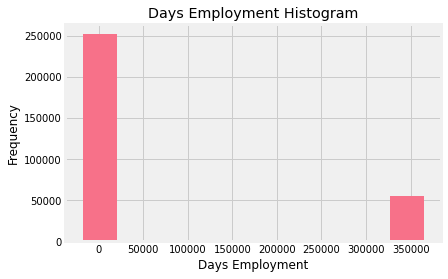

In [ ]:
train['DAYS_EMPLOYED'].plot.hist(title='Days Employment Histogram');
plt.xlabel('Days Employment');

Just out of curiousity, let's subset the anomalous clients and see if they tend to have higher or low rates of default than the rest of the clients.

In [ ]:
anom = train[train['DAYS_EMPLOYED'] == 365243]
non_anom = train[train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % 
     (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' %
     (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


Well that is extremely interesting! It turns out that the anomalies have a lower rate of default.

Handling the anomalies depends on the exact situation, with no set rules. One of the safest approaches is just to set the anomalies to a missing value and then have them filled in (using Imputation) before machine learning. In this case, since all the anomalies have the exact same value, we want to fill them in with the same value in case all of these loans share something in common. The anomalous values seem to have some importance, so we want to tell the machine learning model if we did in fact fill in these values. As a solution, we will fill in the anomalous values with not a number (np.nan) and then create a new boolean column indicating whether or not the value was anomalous.

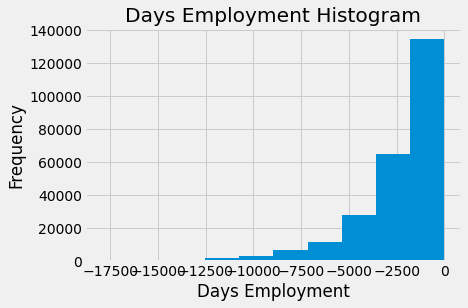

In [ ]:
# Create an anomalous flag column
train['DAYS_EMPLOYED_ANOM'] = train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

The distribution looks to be much more in line with what we would expect, and we also have created a new column to tell the model that these values were originally anomalous (becuase we will have to fill in the nans with some value, probably the median of the column). The other columns with DAYS in the dataframe look to be about what we expect with no obvious outliers.

**2.10. Column Types**

Let's look at the number of columns of each data type. int64 and float64 are numeric variables (which can be either discrete or continuous). object columns contain strings and are categorical features. 

In [ ]:
# Number of each type of column
train.dtypes.value_counts()

float64    66
int64      40
object     16
bool        1
dtype: int64

Let's now look at the number of unique entries in each of the object (categorical) columns.

In [ ]:
# Number of unique classes in each object column
train.select_dtypes('object').apply(pd.Series.nunique, axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Most of the categorical variables have a relatively small number of unique entries. We will need to find a way to deal with these categorical variables!

**Encoding Categorical Variables**

Before we go any further, we need to deal with pesky categorical variables. A machine learning model unfortunately cannot deal with categorical variables (except for some models such as LightGBM). Therefore, we have to find a way to encode (represent) these variables as numbers before handing them off to the model. There are two main ways to carry out this process:

* Label encoding: assign each unique category in a categorical variable with an integer. No new columns are created. An example is shown below
image

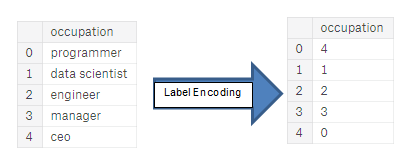

* One-hot encoding: create a new column for each unique category in a categorical variable. Each observation recieves a 1 in the column for its corresponding category and a 0 in all other new columns.
 
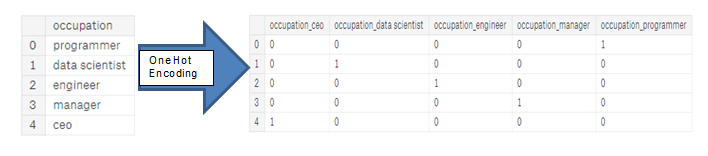 

The problem with label encoding is that it gives the categories an arbitrary ordering. The value assigned to each of the categories is random and does not reflect any inherent aspect of the category. In the example above, programmer recieves a 4 and data scientist a 1, but if we did the same process again, the labels could be reversed or completely different. The actual assignment of the integers is arbitrary. Therefore, when we perform label encoding, the model might use the relative value of the feature (for example programmer = 4 and data scientist = 1) to assign weights which is not what we want. If we only have two unique values for a categorical variable (such as Male/Female), then label encoding is fine, but for more than 2 unique categories, one-hot encoding is the safe option.

There is some debate about the relative merits of these approaches, and some models can deal with label encoded categorical variables with no issues. Here is a good Stack Overflow discussion. I think (and this is just a personal opinion) for categorical variables with many classes, one-hot encoding is the safest approach because it does not impose arbitrary values to categories. The only downside to one-hot encoding is that the number of features (dimensions of the data) can explode with categorical variables with many categories. To deal with this, we can perform one-hot encoding followed by PCA or other dimensionality reduction methods to reduce the number of dimensions (while still trying to preserve information).

In this notebook, we will use Label Encoding for any categorical variables with only 2 categories and One-Hot Encoding for any categorical variables with more than 2 categories. This process may need to change as we get further into the project, but for now, we will see where this gets us. (We will also not use any dimensionality reduction in this notebook but will explore in future iterations).


**Label Encoding and One-Hot Encoding**

Let's implement the policy described above: for any categorical variable (dtype == object) with 2 unique categories, we will use label encoding, and for any categorical variable with more than 2 unique categories, we will use one-hot encoding.

For label encoding, we use the Scikit-Learn LabelEncoder and for one-hot encoding, the pandas get_dummies(df) function.

In [ ]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in train:
    if train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(train[col].unique())) <= 2:
            # Train on the  data
            le.fit(train[col])
            # Transform data
            train[col] = le.transform(train[col])
          
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [ ]:
# one-hot encoding of categorical variables
train = pd.get_dummies(train)

print('Training Features shape: ', train.shape)

Training Features shape:  (307511, 244)


**2.11. Correlations**

Now that we have dealt with the categorical variables and the outliers, let's continue with the EDA. One way to try and understand the data is by looking for correlations between the features and the target. We can calculate the Pearson correlation coefficient between every variable and the target using the .corr dataframe method.

The correlation coefficient is not the greatest method to represent "relevance" of a feature, but it does give us an idea of possible relationships within the data. Some general interpretations of the absolute value of the correlation coefficent are:

.00-.19 “very weak”
.20-.39 “weak”
.40-.59 “moderate”
.60-.79 “strong”
.80-1.0 “very strong”

In [ ]:
# Find correlations with the target and sort
correlations = train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

Let's take a look at some of more significant correlations: the DAYS_BIRTH is the most positive correlation. (except for TARGET because the correlation of a variable with itself is always 1!) Looking at the documentation, DAYS_BIRTH is the age in days of the client at the time of the loan in negative days (for whatever reason!). The correlation is positive, but the value of this feature is actually negative, meaning that as the client gets older, they are less likely to default on their loan (ie the target == 0). That's a little confusing, so we will take the absolute value of the feature and then the correlation will be negative.

**2.12. Effect of Age on Repayment**

In [ ]:
# Find the correlation of the positive days since birth and target
train['DAYS_BIRTH'] = abs(train['DAYS_BIRTH'])
train['DAYS_BIRTH'].corr(train['TARGET'])

-0.07823930830982694

As the client gets older, there is a negative linear relationship with the target meaning that as clients get older, they tend to repay their loans on time more often.

Let's start looking at this variable. First, we can make a histogram of the age. We will put the x axis in years to make the plot a little more understandable.

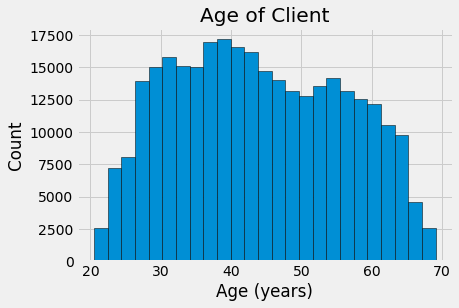

In [ ]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(train['DAYS_BIRTH'] / 365, edgecolor='k', bins=25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

By itself, the distribution of age does not tell us much other than that there are no outliers as all the ages are reasonable. To visualize the effect of the age on the target, we will next make a kernel density estimation plot (KDE) colored by the value of the target. A kernel density estimate plot shows the distribution of a single variable and can be thought of as a smoothed histogram (it is created by computing a kernel, usually a Gaussian, at each data point and then averaging all the individual kernels to develop a single smooth curve). We will use the seaborn kdeplot for this graph.

**Function for KDE Plots of Variable**

We also made a function that plots the distribution of variable colored by the value of TARGET (either 1 for did not repay the loan or 0 for did repay the loan). We can use this function to visually examine any new variables we create. This also calculates the correlation cofficient of the variable with the target which can be used as an approximation of whether or not the created variable will be useful.

In [ ]:
# Plots the disribution of a variable colored by value of the target
def kde_target(var_name, df):
    
    # Calculate the correlation coefficient between the new variable and the target
    corr = df['TARGET'].corr(df[var_name])
    
    # Calculate medians for repaid vs not repaid
    avg_repaid = df.loc[df['TARGET'] == 0, var_name].median()
    avg_not_repaid = df.loc[df['TARGET'] == 1, var_name].median()
    
    plt.figure(figsize = (12, 6))
    
    # Plot the distribution for target == 0 and target == 1
    sns.kdeplot(df.loc[df['TARGET'] == 0, var_name], label = 'TARGET == 0')
    sns.kdeplot(df.loc[df['TARGET'] == 1, var_name], label = 'TARGET == 1')
    
    # label the plot
    plt.xlabel(var_name); plt.ylabel('Density'); plt.title('%s Distribution'\
                                                           % var_name)
    plt.legend();
    
    # print out the correlation
    print('The correlation between %s and the TARGET is %0.4f' % (var_name,
                                                                  corr))
    # Print out average values
    print('Median value for loan that was not repaid = %0.4f' % avg_not_repaid)
    print('Median value for loan that was repaid =     %0.4f' % avg_repaid)
    

In [ ]:
train['DAYS_BIRTH'] = train['DAYS_BIRTH'] / 365

The correlation between DAYS_BIRTH and the TARGET is -0.0782
Median value for loan that was not repaid = 39.1288
Median value for loan that was repaid =     43.4986


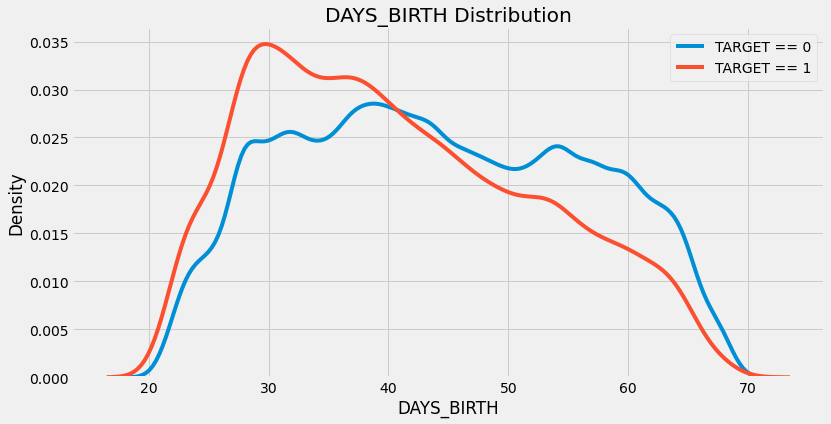

In [ ]:
kde_target('DAYS_BIRTH', train)

The target == 1 curve skews towards the younger end of the range. Although this is not a significant correlation (-0.07 correlation coefficient), this variable is likely going to be useful in a machine learning model because it does affect the target. Let's look at this relationship in another way: average failure to repay loans by age bracket.

To make this graph, first we cut the age category into bins of 5 years each. Then, for each bin, we calculate the average value of the target, which tells us the ratio of loans that were not repaid in each age category.

In [ ]:
# Age information into a separate dataframe
age_data = train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], 
                                  bins = np.linspace(20, 70, num=11))
age_data.head(10)

TARGET  DAYS_BIRTH  YEARS_BIRTH YEARS_BINNED
0       1       -9461   -25.920548          NaN
1       0      -16765   -45.931507          NaN
2       0      -19046   -52.180822          NaN
3       0      -19005   -52.068493          NaN
4       0      -19932   -54.608219          NaN
5       0      -16941   -46.413699          NaN
6       0      -13778   -37.747945          NaN
7       0      -18850   -51.643836          NaN
8       0      -20099   -55.065753          NaN
9       0      -14469   -39.641096          NaN

In [ ]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

TARGET  DAYS_BIRTH  YEARS_BIRTH
YEARS_BINNED                                 
(20.0, 25.0]     NaN         NaN          NaN
(25.0, 30.0]     NaN         NaN          NaN
(30.0, 35.0]     NaN         NaN          NaN
(35.0, 40.0]     NaN         NaN          NaN
(40.0, 45.0]     NaN         NaN          NaN
(45.0, 50.0]     NaN         NaN          NaN
(50.0, 55.0]     NaN         NaN          NaN
(55.0, 60.0]     NaN         NaN          NaN
(60.0, 65.0]     NaN         NaN          NaN
(65.0, 70.0]     NaN         NaN          NaN

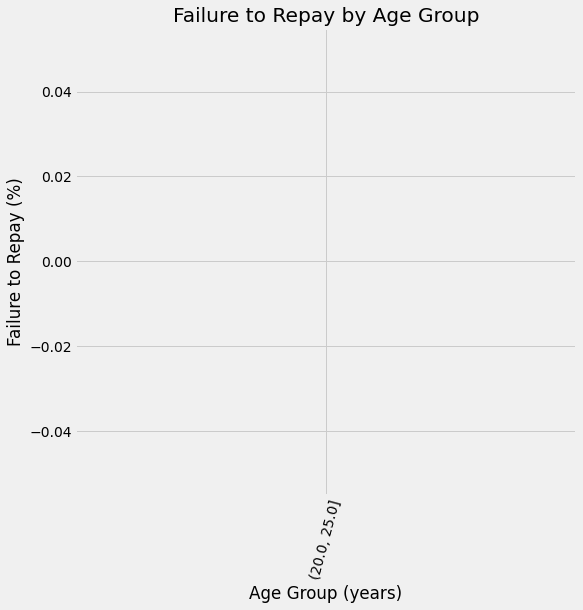

In [ ]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100*age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation=75); plt.xlabel('Age Group (years)');
plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

There is a clear trend: younger applicants are more likely to not repay the loan! The rate of failure to repay is above 10% for the youngest three age groups and below 5% for the oldest age group.

This is information that could be directly used by the bank: because younger clients are less likely to repay the loan, maybe they should be provided with more guidance or financial planning tips. This does not mean the bank should discriminate against younger clients, but it would be smart to take precautionary measures to help younger clients pay on time.

**2.13. Exterior Sources**

The 2 variables with the strongest negative correlations with the target are EXT_SOURCE_2, and EXT_SOURCE_3. According to the documentation, these features represent a "normalized score from external data source". I'm not sure what this exactly means, but it may be a cumulative sort of credit rating made using numerous sources of data.

Let's take a look at these variables.

First, we can show the correlations of the EXT_SOURCE features with the target and with each other.

In [ ]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
                  'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

TARGET  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_BIRTH
TARGET        1.000000     -0.155317     -0.160472     -0.178919   -0.078239
EXT_SOURCE_1 -0.155317      1.000000      0.213982      0.186846    0.600610
EXT_SOURCE_2 -0.160472      0.213982      1.000000      0.109167    0.091996
EXT_SOURCE_3 -0.178919      0.186846      0.109167      1.000000    0.205478
DAYS_BIRTH   -0.078239      0.600610      0.091996      0.205478    1.000000

In [ ]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap=plt.cm.RdYlBu_r, vmin=-0.25, annot=True,
            vmax=0.6)
plt.title('Correlation Heatmap');

The three EXT_SOURCE features have negative correlations with the target, indicating that as the value of the EXT_SOURCE increases, the client is more likely to repay the loan. 

Next we can look at the distribution of each of these features colored by the value of the target. This will let us visualize the effect of this variable on the target.

The correlation between EXT_SOURCE_1 and the TARGET is -0.1553
Median value for loan that was not repaid = 0.3617
Median value for loan that was repaid =     0.5175
The correlation between EXT_SOURCE_2 and the TARGET is -0.1605
Median value for loan that was not repaid = 0.4404
Median value for loan that was repaid =     0.5739
The correlation between EXT_SOURCE_3 and the TARGET is -0.1789
Median value for loan that was not repaid = 0.3791
Median value for loan that was repaid =     0.5460


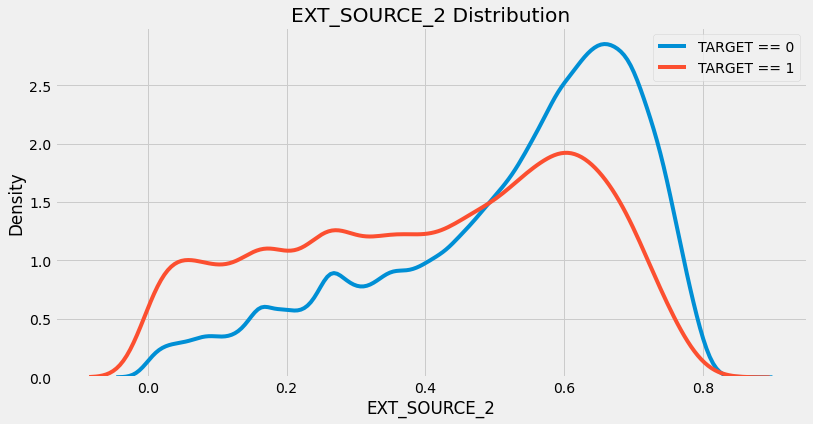

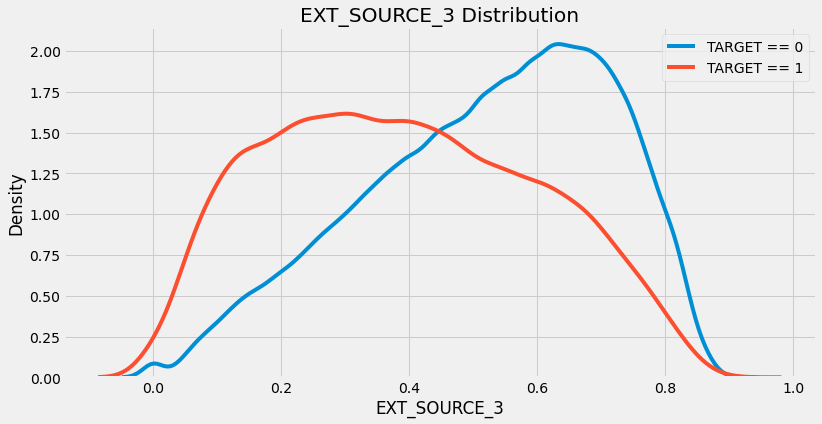

In [ ]:
# iterate through the sources
for i in ('EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'):
  kde_target(i, train)
    


EXT_SOURCE_3 displays the greatest difference between the values of the target. We can clearly see that this feature has some relationship to the likelihood of an applicant to repay a loan. The relationship is not very strong (in fact they are all considered very weak, but these variables will still be useful for a machine learning model to predict whether or not an applicant will repay a loan on time.

# **3. Feature Engineering**

**3.1. Test application**

In [ ]:
overview(test)

Shape of the dataframe is: (48744, 121)
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
Information about features:  None
************************************************************
Total number of null values: 
  SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     6049
AMT_REQ_CREDIT_BUREAU_WEEK    6049
AMT_REQ_CREDIT_BUREAU_MON     6049
AMT_REQ_CREDIT_BUREAU_QRT     6049
AMT_REQ_CREDIT_BUREAU_YEAR    6049
Length: 121, dtype: int64
************************************************************
_______________________________________________________________________________________________

SK_ID_CURR  ... AMT_REQ_CREDIT_BUREAU_YEAR
0      100001  ...                        0.0
1      100005  ...                        3.0

[2 rows x 121 columns]

The test set is considerably smaller and lacks a TARGET column.
We will concatenate train and test data.

In [ ]:
# to clean up my dataset, I adopt the method to Keep only columns where 40% or 
# more valid data is available

test = test.dropna(how='any', axis=1, thresh=test.shape[0]*0.40)
test.shape

(48744, 104)

In [ ]:
df = train.append(test)
del train, test; gc.collect()

7

**3.2. Bureau application**

Shape of the dataframe is: (1716428, 17)
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
Information about 

SK_ID_CURR  SK_ID_BUREAU  ... DAYS_CREDIT_UPDATE AMT_ANNUITY
0      215354       5714462  ...               -131         NaN
1      215354       5714463  ...                -20         NaN

[2 rows x 17 columns]

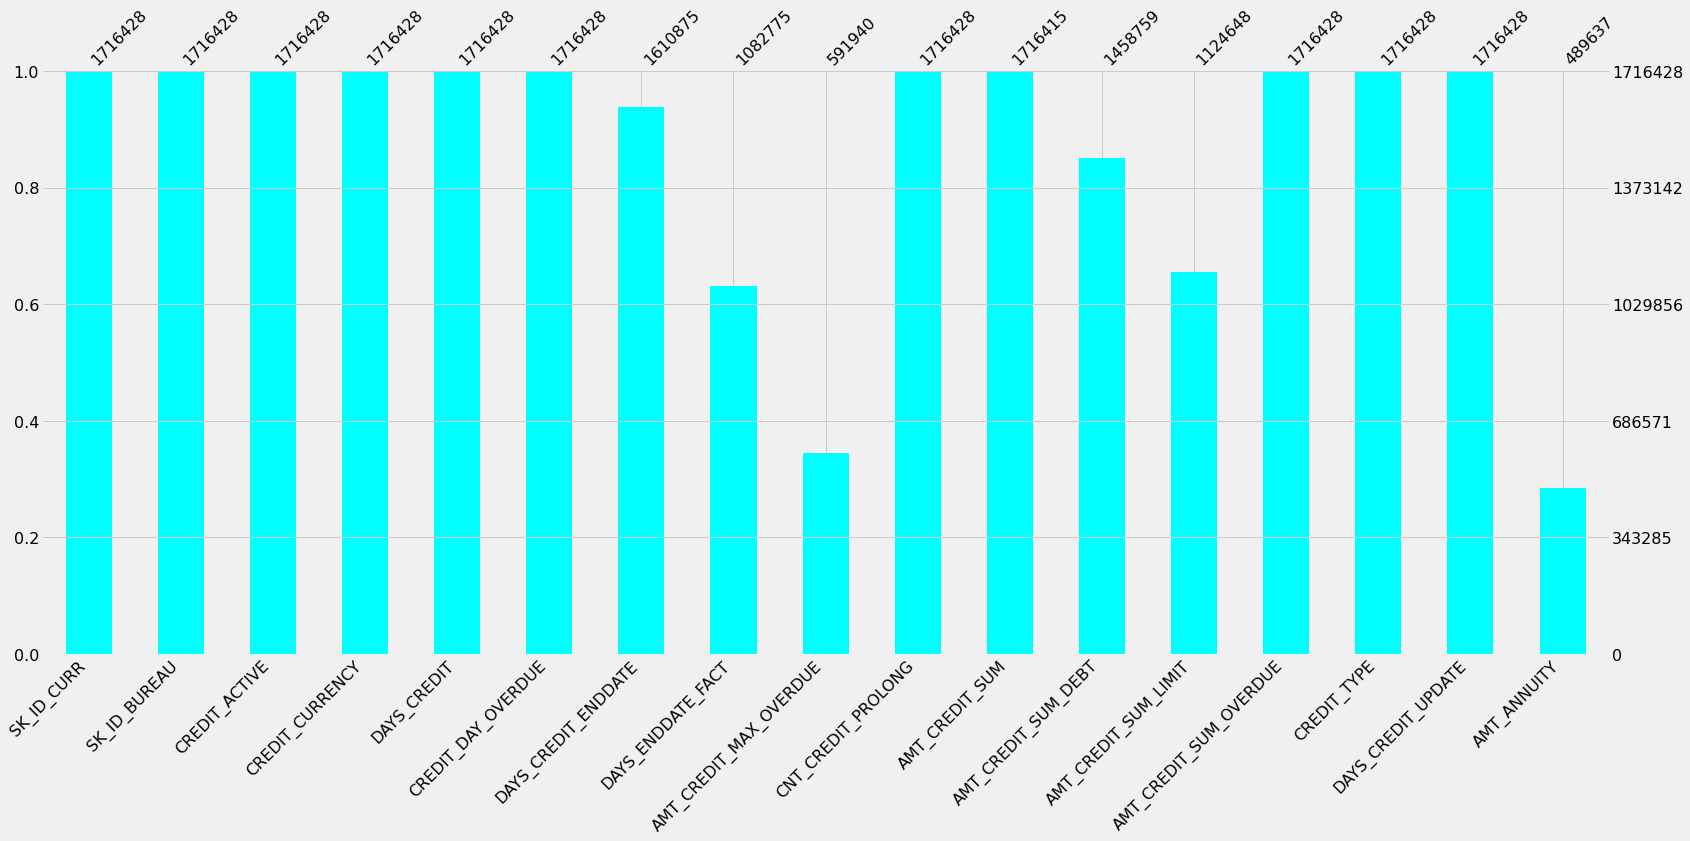

In [ ]:
overview(bureau)

Bureau data contains all client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in the sample). For every loan in the sample, there are as many rows as number of credits the client had in Credit Bureau before the application date. SK_ID_CURR is the key connecting application_train|test data with bureau data.

we will first simply get the count of a client's previous loans at other financial institutions. This requires a number of Pandas operations we will make heavy use of throughout the notebook:

* groupby: group a dataframe by a column. In this case we will group by the unique client, the SK_ID_CURR column
* agg: perform a calculation on the grouped data such as taking the mean of columns. We can either call the function directly (grouped_df.mean()) or use the agg function together with a list of transforms (grouped_df.agg([mean, max, min, sum]))
* merge: match the aggregated statistics to the appropriate client. We need to merge the original training data with the calculated stats on the SK_ID_CURR column which will insert NaN in any cell for which the client does not have the corresponding statistic.

We also use the (rename) function quite a bit specifying the columns to be renamed as a dictionary. This is useful in order to keep track of the new variables we create.


In [ ]:
# Groupby the client id (SK_ID_CURR), count the number of previous loans, and rename the column
previous_loan_counts = bureau.groupby('SK_ID_CURR',
                                      as_index=False)['SK_ID_BUREAU'].count()\
                                      .rename(columns = {'SK_ID_BUREAU':
                                                       'previous_loan_counts'})
previous_loan_counts.head()

SK_ID_CURR  previous_loan_counts
0      100001                     7
1      100002                     8
2      100003                     4
3      100004                     2
4      100005                     3

In [ ]:
# Join to the dataframe
df = df.merge(previous_loan_counts, on = 'SK_ID_CURR', how='left')

# Fill the missing values with 0 
df['previous_loan_counts'] = df['previous_loan_counts'].fillna(0)
df.head(3)

SK_ID_CURR  TARGET  ... AMT_REQ_CREDIT_BUREAU_YEAR previous_loan_counts
0      100002     1.0  ...                        1.0                  8.0
1      100003     0.0  ...                        0.0                  4.0
2      100004     0.0  ...                        0.0                  2.0

[3 rows x 106 columns]

To determine if the new variable is useful, we can calculate the Pearson Correlation Coefficient (r-value) between this variable and the target. This measures the strength of a linear relationship between two variables and ranges from -1 (perfectly negatively linear) to +1 (perfectly positively linear). The r-value is not best measure of the "usefulness" of a new variable, but it can give a first approximation of whether a variable will be helpful to a machine learning model. The larger the r-value of a variable with respect to the target, the more a change in this variable is likely to affect the value of the target. Therefore, we look for the variables with the greatest absolute value r-value relative to the target.

We can also visually inspect a relationship with the target using the Kernel Density Estimate (KDE) plot.

Now for the new variable we just made, the number of previous loans at other institutions.

The correlation between previous_loan_counts and the TARGET is -0.0158
Median value for loan that was not repaid = 2.0000
Median value for loan that was repaid =     3.0000


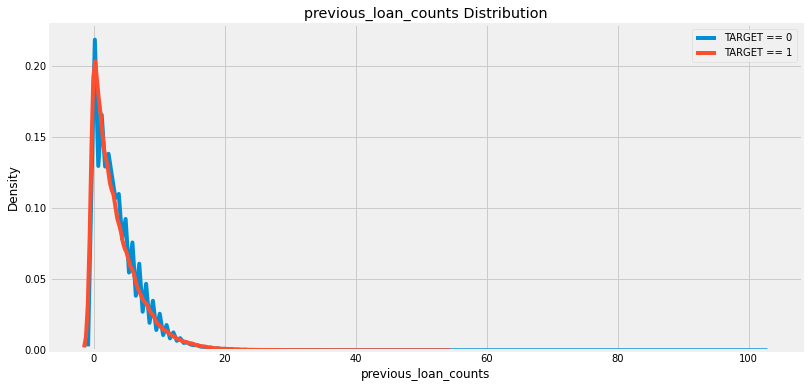

In [ ]:
kde_target('previous_loan_counts', df)

From this it's difficult to tell if this variable will be important. The correlation coefficient is extremely weak and there is almost no noticeable difference in the distributions.

Let's move on to make a few more variables from the bureau dataframe. We will take the mean, min, and max of every numeric column in the bureau dataframe.

**Aggregating Numeric Columns**

To account for the numeric information in the bureau dataframe, we can compute statistics for all the numeric columns. To do so, we groupby the client id, agg the grouped dataframe, and merge the result back into the training data. The agg function will only calculate the values for the numeric columns where the operation is considered valid. We will stick to using 'mean', 'max', 'min', 'sum' but any function can be passed in here. We can even write our own function and use it in an agg call.

In [ ]:
# Group by the client id, calculate aggregation statistics
bureau_agg = bureau.drop(columns = ['SK_ID_BUREAU']).groupby('SK_ID_CURR',
                         as_index=False).agg(['count', 'mean', 'max', 'min',
                                              'sum']).reset_index()
bureau_agg.head()

SK_ID_CURR DAYS_CREDIT                    ...  AMT_ANNUITY                       
                   count         mean  max  ...         mean      max  min      sum
0     100001           7  -735.000000  -49  ...  3545.357143  10822.5  0.0  24817.5
1     100002           8  -874.000000 -103  ...     0.000000      0.0  0.0      0.0
2     100003           4 -1400.750000 -606  ...          NaN      NaN  NaN      0.0
3     100004           2  -867.000000 -408  ...          NaN      NaN  NaN      0.0
4     100005           3  -190.666667  -62  ...  1420.500000   4261.5  0.0   4261.5

[5 rows x 61 columns]

We need to create new names for each of these columns. The following code makes new names by appending the stat to the name. Here we have to deal with the fact that the dataframe has a multi-level index. I find these confusing and hard to work with, so I try to reduce to a single level index as quickly as possible.

In [ ]:
# List of column names
columns = ['SK_ID_CURR']

# Iterate through the variables names
for var in bureau_agg.columns.levels[0]:
    # Skip the id name
    if var != 'SK_ID_CURR':
        
        # Iterate through the stat names
        for stat in bureau_agg.columns.levels[1][:-1]:
            # Make a new column name for the variable and stat
            columns.append('bureau_%s_%s' % (var, stat))

In [ ]:
# Assign the list of columns names as the dataframe column names
bureau_agg.columns = columns
bureau_agg.head(3)

SK_ID_CURR  ...  bureau_AMT_ANNUITY_sum
0      100001  ...                 24817.5
1      100002  ...                     0.0
2      100003  ...                     0.0

[3 rows x 61 columns]

Now we simply merge with the training data as we did before.

In [ ]:
# Merge with the train data
df = df.merge(bureau_agg, on='SK_ID_CURR', how='left')
df.head(3)

SK_ID_CURR  TARGET  ... bureau_AMT_ANNUITY_min bureau_AMT_ANNUITY_sum
0      100002     1.0  ...                    0.0                    0.0
1      100003     0.0  ...                    NaN                    0.0
2      100004     0.0  ...                    NaN                    0.0

[3 rows x 166 columns]

**Correlations of Aggregated Values with Target**

We can calculate the correlation of all new values with the target. Again, we can use these as an approximation of the variables which may be important for modeling.

In [ ]:
# List of new correlations
new_corrs = []

# Iterate through the columns 
for col in columns:
    # Calculate correlation with the target
    corr = df['TARGET'].corr(df[col])
    
    # Append the list as a tuple
    new_corrs.append((col, corr))

In the code below, we sort the correlations by the magnitude (absolute value) using the sorted Python function. We also make use of an anonymous lambda function, another important Python operation that is good to know.

In [ ]:
# Sort the correlations by the absolute value
# Make sure to reverse to put the largest values at the front of list
new_corrs = sorted(new_corrs, key=lambda x: abs(x[1]), reverse=True)
new_corrs[:15]

[('bureau_DAYS_CREDIT_mean', 0.08972896721998114),
 ('bureau_DAYS_CREDIT_min', 0.0752482510301036),
 ('bureau_DAYS_CREDIT_UPDATE_mean', 0.06892735266968673),
 ('bureau_DAYS_ENDDATE_FACT_min', 0.05588737984392077),
 ('bureau_DAYS_CREDIT_ENDDATE_sum', 0.0537348956010205),
 ('bureau_DAYS_ENDDATE_FACT_mean', 0.05319962585758616),
 ('bureau_DAYS_CREDIT_max', 0.04978205463997299),
 ('bureau_DAYS_ENDDATE_FACT_sum', 0.048853502611115894),
 ('bureau_DAYS_CREDIT_ENDDATE_mean', 0.046982754334835494),
 ('bureau_DAYS_CREDIT_UPDATE_min', 0.042863922470730155),
 ('bureau_DAYS_CREDIT_sum', 0.041999824814846716),
 ('bureau_DAYS_CREDIT_UPDATE_sum', 0.04140363535306002),
 ('bureau_DAYS_CREDIT_ENDDATE_max', 0.036589634696329094),
 ('bureau_DAYS_CREDIT_ENDDATE_min', 0.034281109921616024),
 ('bureau_DAYS_ENDDATE_FACT_count', -0.030492306653325495)]

None of the new variables have a significant correlation with the TARGET. We can look at the KDE plot of the highest correlated variable, bureau_DAYS_CREDIT_mean, with the target in in terms of absolute magnitude correlation.

The correlation between bureau_DAYS_CREDIT_mean and the TARGET is 0.0897
Median value for loan that was not repaid = -835.3333
Median value for loan that was repaid =     -1067.0000


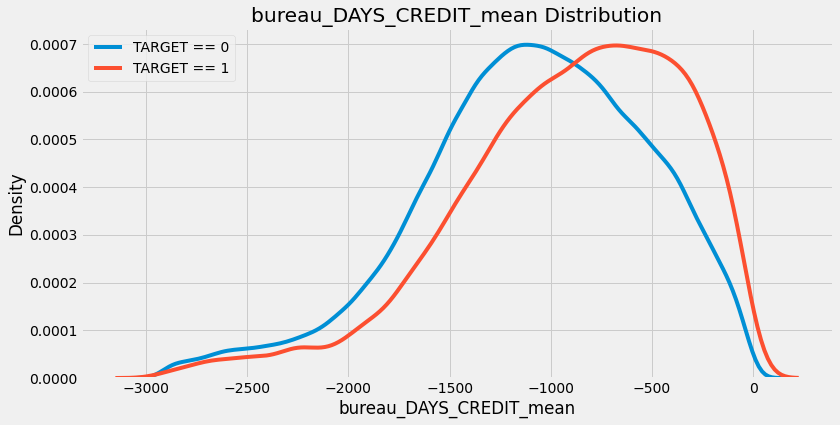

In [ ]:
kde_target('bureau_DAYS_CREDIT_mean', df)

The definition of this column is: "How many days before current application did client apply for Credit Bureau credit". My interpretation is this is the number of days that the previous loan was applied for before the application for a loan at Home Credit. Therefore, a larger negative number indicates the loan was further before the current loan application. We see an extremely weak positive relationship between the average of this variable and the target meaning that clients who applied for loans further in the past potentially are more likely to repay loans at Home Credit. With a correlation this weak though, it is just as likely to be noise as a signal.

The Multiple Comparisons Problem
When we have lots of variables, we expect some of them to be correlated just by pure chance, a problem known as multiple comparisons. We can make hundreds of features, and some will turn out to be corelated with the target simply because of random noise in the data. Then, when our model trains, it may overfit to these variables because it thinks they have a relationship with the target in the training set, but this does not necessarily generalize to the test set. There are many considerations that we have to take into account when making features!

**Function for Numeric Aggregations**

Let's encapsulate all of the previous work into a function. This will allow us to compute aggregate stats for numeric columns across any dataframe. We will re-use this function when we want to apply the same operations for other dataframes.

In [ ]:
def agg_numeric(df, group_var, df_name):
    """Aggregates the numeric values in a dataframe. This can
    be used to create features for each instance of the grouping variable.
    
    Parameters
    --------
        df (dataframe): 
            the dataframe to calculate the statistics on
        group_var (string): 
            the variable by which to group df
        df_name (string): 
            the variable used to rename the columns
        
    Return
    --------
        agg (dataframe): 
            a dataframe with the statistics aggregated for 
            all numeric columns. Each instance of the grouping variable will have 
            the statistics (mean, min, max, sum; currently supported) calculated. 
            The columns are also renamed to keep track of features created.
    
    """
    # Remove id variables other than grouping variable
    for col in df:
        if col != group_var and 'SK_ID' in col:
            df = df.drop(columns=col)
            
    group_ids = df[group_var]
    numeric_df = df.select_dtypes('number')
    numeric_df[group_var] = group_ids

    # Group by the specified variable and calculate the statistics
    agg = numeric_df.groupby(group_var).agg(['count', 'mean', 'max', 'min', 
                                             'sum']).reset_index()

    # Need to create new column names
    columns = [group_var]

    # Iterate through the variables names
    for var in agg.columns.levels[0]:
        # Skip the grouping variable
        if var != group_var:
            # Iterate through the stat names
            for stat in agg.columns.levels[1][:-1]:
                # Make a new column name for the variable and stat
                columns.append('%s_%s_%s' % (df_name, var, stat))

    agg.columns = columns
    return agg

In [ ]:
bureau_agg_new = agg_numeric(bureau.drop(columns = ['SK_ID_BUREAU']), 
                             group_var = 'SK_ID_CURR', df_name = 'bureau')
bureau_agg_new.head()

SK_ID_CURR  ...  bureau_AMT_ANNUITY_sum
0      100001  ...                 24817.5
1      100002  ...                     0.0
2      100003  ...                     0.0
3      100004  ...                     0.0
4      100005  ...                  4261.5

[5 rows x 61 columns]

To make sure the function worked as intended, we should compare with the aggregated dataframe we constructed by hand.

In [ ]:
bureau_agg.head()

SK_ID_CURR  ...  bureau_AMT_ANNUITY_sum
0      100001  ...                 24817.5
1      100002  ...                     0.0
2      100003  ...                     0.0
3      100004  ...                     0.0
4      100005  ...                  4261.5

[5 rows x 61 columns]

If we go through and inspect the values, we do find that they are equivalent. We will be able to reuse this function for calculating numeric stats for other dataframes. Using functions allows for consistent results and decreases the amount of work we have to do in the future!

**Correlation Function**

Before we move on, we can also make the code to calculate correlations with the target into a function.

In [ ]:
# Function to calculate correlations with the target for a dataframe
def target_corrs(df):

    # List of correlations
    corrs = []

    # Iterate through the columns 
    for col in df_domain.columns:
        print(col)
        # Skip the target column
        if col != 'TARGET':
            # Calculate correlation with the target
            corr = df_domain['TARGET'].corr(df_domain[col])

            # Append the list as a tuple
            corrs.append((col, corr))
            
    # Sort by absolute magnitude of correlations
    corrs = sorted(corrs, key = lambda x: abs(x[1]), reverse=True)
    
    return corrs

**Categorical Variables**

Now we move from the numeric columns to the categorical columns.

First we one-hot encode a dataframe with only the categorical columns (dtype == 'object').

In [ ]:
categorical = pd.get_dummies(bureau.select_dtypes('object'))
categorical['SK_ID_CURR'] = bureau['SK_ID_CURR']
categorical.head()

CREDIT_ACTIVE_Active  ...  SK_ID_CURR
0                     0  ...      215354
1                     1  ...      215354
2                     1  ...      215354
3                     1  ...      215354
4                     1  ...      215354

[5 rows x 24 columns]

In [ ]:
categorical_grouped = categorical.groupby('SK_ID_CURR').agg(['sum', 'mean'])
categorical_grouped.head()

CREDIT_ACTIVE_Active            ... CREDIT_TYPE_Unknown type of loan     
                            sum      mean  ...                              sum mean
SK_ID_CURR                                 ...                                      
100001                        3  0.428571  ...                                0  0.0
100002                        2  0.250000  ...                                0  0.0
100003                        1  0.250000  ...                                0  0.0
100004                        0  0.000000  ...                                0  0.0
100005                        2  0.666667  ...                                0  0.0

[5 rows x 46 columns]

The sum columns represent the count of that category for the associated client and the mean represents the normalized count. One-hot encoding makes the process of calculating these figures very easy!

We can use a similar function as before to rename the columns. Again, we have to deal with the multi-level index for the columns. We iterate through the first level (level 0) which is the name of the categorical variable appended with the value of the category (from one-hot encoding). Then we iterate stats we calculated for each client. We will rename the column with the level 0 name appended with the stat. As an example, the column with CREDIT_ACTIVE_Active as level 0 and sum as level 1 will become CREDIT_ACTIVE_Active_count.

In [ ]:
categorical_grouped.columns.levels[0][:10]

Index(['CREDIT_ACTIVE_Active', 'CREDIT_ACTIVE_Bad debt',
       'CREDIT_ACTIVE_Closed', 'CREDIT_ACTIVE_Sold',
       'CREDIT_CURRENCY_currency 1', 'CREDIT_CURRENCY_currency 2',
       'CREDIT_CURRENCY_currency 3', 'CREDIT_CURRENCY_currency 4',
       'CREDIT_TYPE_Another type of loan', 'CREDIT_TYPE_Car loan'],
      dtype='object')

In [ ]:
categorical_grouped.columns.levels[1]

Index(['sum', 'mean'], dtype='object')

In [ ]:
group_var = 'SK_ID_CURR'

# Need to create new column names
columns = []

# Iterate through the variables names
for var in categorical_grouped.columns.levels[0]:
    # Skip the grouping variable
    if var != group_var:
        # Iterate through the stat names
        for stat in ['count', 'count_norm']:
            # Make a new column name for the variable and stat
            columns.append('%s_%s' % (var, stat))

#  Rename the columns
categorical_grouped.columns = columns

categorical_grouped.head(3)

NameError: ignored

The sum column records the counts and the mean column records the normalized count.

We can merge this dataframe into the training data.

In [ ]:
df= df.merge(categorical_grouped, left_on='SK_ID_CURR',right_index=True, 
             how='left')
df.head(3)

SK_ID_CURR  ...  CREDIT_TYPE_Unknown type of loan_count_norm
0      100002  ...                                          0.0
1      100003  ...                                          0.0
2      100004  ...                                          0.0

[3 rows x 342 columns]

In [ ]:
df.shape

(356255, 342)

**Function to Handle Categorical Variables**

To make the code more efficient, we can now write a function to handle the categorical variables for us. This will take the same form as the agg_numeric function in that it accepts a dataframe and a grouping variable. Then it will calculate the counts and normalized counts of each category for all categorical variables in the dataframe.

In [ ]:
def count_categorical(df, group_var, df_name):
    """Computes counts and normalized counts for each observation
    of `group_var` of each unique category in every categorical variable
    
    Parameters
    --------
    df : dataframe 
        The dataframe to calculate the value counts for.
        
    group_var : string
        The variable by which to group the dataframe. For each unique
        value of this variable, the final dataframe will have one row
        
    df_name : string
        Variable added to the front of column names to keep track of columns

    
    Return
    --------
    categorical : dataframe
        A dataframe with counts and normalized counts of each unique category in every categorical variable
        with one row for every unique value of the `group_var`.
        
    """
    
    # Select the categorical columns
    categorical = pd.get_dummies(df.select_dtypes('object'))

    # Make sure to put the identifying id on the column
    categorical[group_var] = df[group_var]

    # Groupby the group var and calculate the sum and mean
    categorical = categorical.groupby(group_var).agg(['sum', 'mean'])
    
    column_names = []
    
    # Iterate through the columns in level 0
    for var in categorical.columns.levels[0]:
        # Iterate through the stats in level 1
        for stat in ['count', 'count_norm']:
            # Make a new column name
            column_names.append('%s_%s_%s' % (df_name, var, stat))
    
    categorical.columns = column_names
    
    return categorical

In [ ]:
bureau_counts = count_categorical(bureau, group_var='SK_ID_CURR', 
                                  df_name='bureau')
bureau_counts.head(3)

bureau_CREDIT_ACTIVE_Active_count  ...  bureau_CREDIT_TYPE_Unknown type of loan_count_norm
SK_ID_CURR                                     ...                                                    
100001                                      3  ...                                                0.0 
100002                                      2  ...                                                0.0 
100003                                      1  ...                                                0.0 

[3 rows x 46 columns]

**3.3. Bureau_balance application**

Shape of the dataframe is: (6329503, 3)
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6329503 entries, 0 to 6329502
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 144.9+ MB
Information about features:  None
************************************************************
Total number of null values: 
  SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64
************************************************************
________________________________________________________________________________________________________________________________________________________________________________________________________


SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C

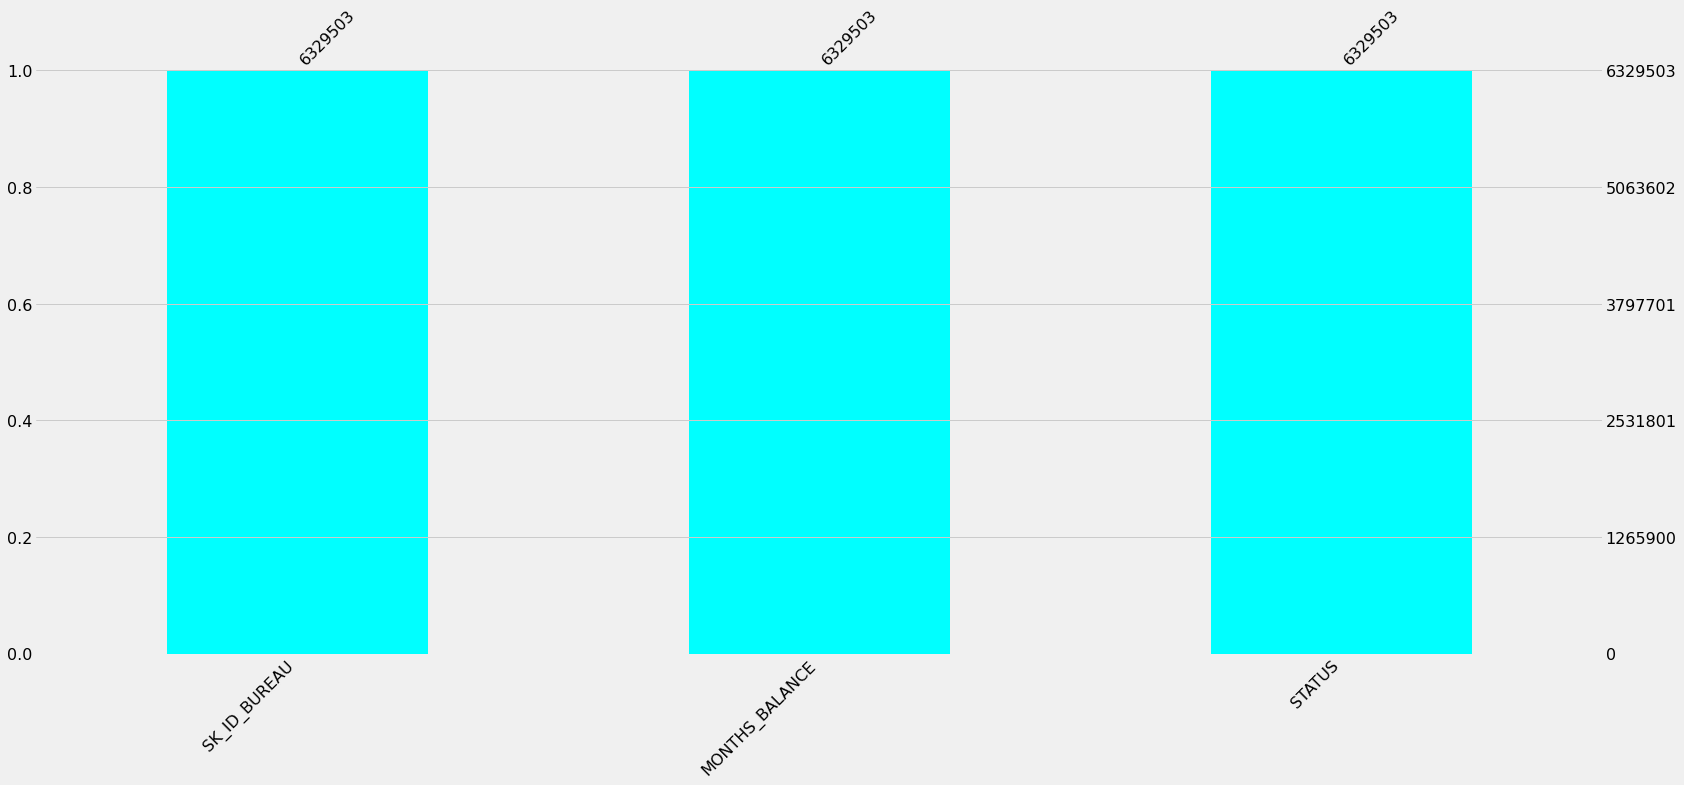

In [ ]:
overview(bureau_balance)

We will now turn to the bureau balance dataframe. This dataframe has monthly information about each client's previous loan(s) with other financial institutions. Instead of grouping this dataframe by the SK_ID_CURR which is the client id, we will first group the dataframe by the SK_ID_BUREAU which is the id of the previous loan. This will give us one row of the dataframe for each loan. Then, we can group by the SK_ID_CURR and calculate the aggregations across the loans of each client. The final result will be a dataframe with one row for each client, with stats calculated for their loans.

In [ ]:
bureau_balance.head()

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

First, we can calculate the value counts of each status for each loan. Fortunately, we already have a function that does this for us!

In [ ]:
# Counts of each type of status for each previous loan
bureau_balance_counts = count_categorical(bureau_balance, 
                                          group_var='SK_ID_BUREAU', 
                                          df_name='bureau_balance')
bureau_balance_counts.head(3)

bureau_balance_STATUS_0_count  ...  bureau_balance_STATUS_X_count_norm
SK_ID_BUREAU                                 ...                                    
5001710                                   5  ...                            0.361446
5001711                                   3  ...                            0.250000
5001712                                  10  ...                            0.000000

[3 rows x 16 columns]

Now we can handle the one numeric column. The MONTHS_BALANCE column has the "months of balance relative to application date." This might not necessarily be that important as a numeric variable, and in future work we might want to consider this as a time variable. For now, we can just calculate the same aggregation statistics as previously.

In [ ]:
# Calculate value count statistics for each `SK_ID_CURR` 
bureau_balance_agg = agg_numeric(bureau_balance, group_var='SK_ID_BUREAU',
                                 df_name='bureau_balance')
bureau_balance_agg.head(3)

SK_ID_BUREAU  ...  bureau_balance_MONTHS_BALANCE_sum
0       5001710  ...                              -3403
1       5001711  ...                                 -6
2       5001712  ...                               -171

[3 rows x 6 columns]

The above dataframes have the calculations done on each loan. Now we need to aggregate these for each client. We can do this by merging the dataframes together first and then since all the variables are numeric, we just need to aggregate the statistics again, this time grouping by the SK_ID_CURR.

In [ ]:
# Dataframe grouped by the loan
bureau_by_loan = bureau_balance_agg.merge(bureau_balance_counts, 
                                          right_index=True,
                                          left_on='SK_ID_BUREAU', how='outer')

# Merge to include the SK_ID_CURR
bureau_by_loan = bureau_by_loan.merge(bureau[['SK_ID_BUREAU', 'SK_ID_CURR']], 
                                      on='SK_ID_BUREAU', how='left')

bureau_by_loan.head(3)

SK_ID_BUREAU  ...  SK_ID_CURR
0       5001710  ...    162368.0
1       5001711  ...    162368.0
2       5001712  ...    162368.0

[3 rows x 23 columns]

In [ ]:
bureau_balance_by_client = agg_numeric(bureau_by_loan.drop(\
                                       columns=['SK_ID_BUREAU']),
                                       group_var='SK_ID_CURR', df_name='client')
bureau_balance_by_client.head(3)

SK_ID_CURR  ...  client_bureau_balance_STATUS_X_count_norm_sum
0    100001.0  ...                                       1.502129
1    100013.0  ...                                       0.000000
2    100019.0  ...                                       0.117647

[3 rows x 106 columns]

To recap, for the bureau_balance dataframe we:

1. Calculated numeric stats grouping by each loan
2. Made value counts of each categorical variable grouping by loan
3. Merged the stats and the value counts on the loans
4. Calculated numeric stats for the resulting dataframe grouping by the client id

The final resulting dataframe has one row for each client, with statistics calculated for all of their loans with monthly balance information.

Some of these variables are a little confusing, so let's try to explain a few:

* client_bureau_balance_MONTHS_BALANCE_mean_mean: For each loan calculate the mean value of MONTHS_BALANCE. Then for each client, calculate the mean of this value for all of their loans.
* client_bureau_balance_STATUS_X_count_norm_sum: For each loan, calculate the number of occurences of STATUS == X divided by the number of total STATUS values for the loan. Then, for each client, add up the values for each loan.
We will hold off on calculating the correlations until we have all the variables together in one dataframe.

**Counts of Bureau Dataframe**

In [ ]:
bureau_counts = count_categorical(bureau, group_var='SK_ID_CURR',
                                  df_name='bureau')
bureau_counts.head(3)

bureau_CREDIT_ACTIVE_Active_count  ...  bureau_CREDIT_TYPE_Unknown type of loan_count_norm
SK_ID_CURR                                     ...                                                    
100001                                      3  ...                                                0.0 
100002                                      2  ...                                                0.0 
100003                                      1  ...                                                0.0 

[3 rows x 46 columns]

**Aggregated Stats of Bureau Dataframe**

In [ ]:
bureau_agg = agg_numeric(bureau.drop(columns=['SK_ID_BUREAU']),
                         group_var='SK_ID_CURR', df_name='bureau')
bureau_agg.head(3)

SK_ID_CURR  ...  bureau_AMT_ANNUITY_sum
0      100001  ...                 24817.5
1      100002  ...                     0.0
2      100003  ...                     0.0

[3 rows x 61 columns]

**Value counts of Bureau Balance dataframe by loan**

In [ ]:
bureau_balance_counts = count_categorical(bureau_balance, 
                                          group_var='SK_ID_BUREAU', 
                                          df_name='bureau_balance')
bureau_balance_counts.head(3)

bureau_balance_STATUS_0_count  ...  bureau_balance_STATUS_X_count_norm
SK_ID_BUREAU                                 ...                                    
5001710                                   5  ...                            0.361446
5001711                                   3  ...                            0.250000
5001712                                  10  ...                            0.000000

[3 rows x 16 columns]

**Aggregated stats of Bureau Balance dataframe by loan**

In [ ]:
bureau_balance_agg = agg_numeric(bureau_balance, group_var='SK_ID_BUREAU', 
                                 df_name='bureau_balance')
bureau_balance_agg.head(3)

SK_ID_BUREAU  ...  bureau_balance_MONTHS_BALANCE_sum
0       5001710  ...                              -3403
1       5001711  ...                                 -6
2       5001712  ...                               -171

[3 rows x 6 columns]

**Aggregated Stats of Bureau Balance by Client**

In [ ]:
# Dataframe grouped by the loan
bureau_by_loan = bureau_balance_agg.merge(bureau_balance_counts, 
                                          right_index=True,
                                          left_on='SK_ID_BUREAU', how='outer')

# Merge to include the SK_ID_CURR
bureau_by_loan = bureau[['SK_ID_BUREAU', 'SK_ID_CURR']].merge(bureau_by_loan,
                                                              on='SK_ID_BUREAU',
                                                              how='left')

# Aggregate the stats for each client
bureau_balance_by_client = agg_numeric(bureau_by_loan.drop(columns=\
                                                           ['SK_ID_BUREAU']),
                                       group_var='SK_ID_CURR', df_name='client')

**Insert Computed Features into Data**

In [ ]:
original_features = list(df.columns)
print('Original Number of Features: ', len(original_features))

Original Number of Features:  166


In [ ]:
# Merge with the value counts of bureau
df = df.merge(bureau_counts, on='SK_ID_CURR', how='left')

# Merge with the stats of bureau
df = df.merge(bureau_agg, on='SK_ID_CURR', how='left')

# Merge with the monthly information grouped by client
df = df.merge(bureau_balance_by_client, on='SK_ID_CURR', 
                            how='left')

In [ ]:
new_features = list(df.columns)
print('Number of features using previous loans from other institutions data: ',
      len(new_features))

Number of features using previous loans from other institutions data:  377


**Function to Calculate Categorical Counts**

This function calculates the occurrences (counts) of each category in a categorical variable for each client. It also calculates the normed count, which is the count for a category divided by the total counts for all categories in a categorical variable.

In [ ]:
def agg_categorical(df, parent_var, df_name):
    """
    Aggregates the categorical features in a child dataframe
    for each observation of the parent variable.
    
    Parameters
    --------
    df : dataframe 
        The dataframe to calculate the value counts for.
        
    parent_var : string
        The variable by which to group and aggregate the dataframe. For each unique
        value of this variable, the final dataframe will have one row
        
    df_name : string
        Variable added to the front of column names to keep track of columns

    
    Return
    --------
    categorical : dataframe
        A dataframe with aggregated statistics for each observation of the parent_var
        The columns are also renamed and columns with duplicate values are removed.
        
    """
    
    # Select the categorical columns
    categorical = pd.get_dummies(df.select_dtypes('category'))

    # Make sure to put the identifying id on the column
    categorical[parent_var] = df[parent_var]

    # Groupby the group var and calculate the sum and mean
    categorical = categorical.groupby(parent_var).agg(['sum', 'count', 'mean'])
    
    column_names = []
    
    # Iterate through the columns in level 0
    for var in categorical.columns.levels[0]:
        # Iterate through the stats in level 1
        for stat in ['sum', 'count', 'mean']:
            # Make a new column name
            column_names.append('%s_%s_%s' % (df_name, var, stat))
    
    categorical.columns = column_names
    
    # Remove duplicate columns by values
    _, idx = np.unique(categorical, axis = 1, return_index = True)
    categorical = categorical.iloc[:, idx]
    
    return categorical

**Function to Convert Data Types**

This will help reduce memory usage by using more efficient types for the variables. For example category is often a better type than object (unless the number of unique categories is close to the number of rows in the dataframe).

In [ ]:
import sys

def return_size(df):
    """Return size of dataframe in gigabytes"""
    return round(sys.getsizeof(df) / 1e9, 2)

def convert_types(df, print_info=False):
    
    original_memory = df.memory_usage().sum()
    
    # Iterate through each column
    for c in df:
        
        # Convert ids and booleans to integers
        if ('SK_ID' in c):
            df[c] = df[c].fillna(0).astype(np.int32)
            
        # Convert objects to category
        elif (df[c].dtype == 'object') and (df[c].nunique() < df.shape[0]):
            df[c] = df[c].astype('category')
        
        # Booleans mapped to integers
        elif list(df[c].unique()) == [1, 0]:
            df[c] = df[c].astype(bool)
        
        # Float64 to float32
        elif df[c].dtype == float:
            df[c] = df[c].astype(np.float32)
            
        # Int64 to int32
        elif df[c].dtype == int:
            df[c] = df[c].astype(np.int32)
        
    new_memory = df.memory_usage().sum()
    
    if print_info:
        print(f'Original Memory Usage: {round(original_memory / 1e9, 2)} gb.')
        print(f'New Memory Usage: {round(new_memory / 1e9, 2)} gb.')
        
    return df

**3.4. Previous application**

Shape of the dataframe is: (158358, 37)
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158358 entries, 0 to 158357
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_PREV                   158358 non-null  int64  
 1   SK_ID_CURR                   158358 non-null  int64  
 2   NAME_CONTRACT_TYPE           158358 non-null  object 
 3   AMT_ANNUITY                  124523 non-null  float64
 4   AMT_APPLICATION              158358 non-null  float64
 5   AMT_CREDIT                   158358 non-null  float64
 6   AMT_DOWN_PAYMENT             77262 non-null   float64
 7   AMT_GOODS_PRICE              123688 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   158357 non-null  object 
 9   HOUR_APPR_PROCESS_START      158357 non-null  float64
 10  FLAG_LAST_APPL_PER_CONTRACT  158357 non-null  object 
 11  NFLAG_LAST_APPL_

SK_ID_PREV  SK_ID_CURR  ... DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877  ...            -37.0                        0.0
1     2802425      108129  ...         365243.0                        1.0

[2 rows x 37 columns]

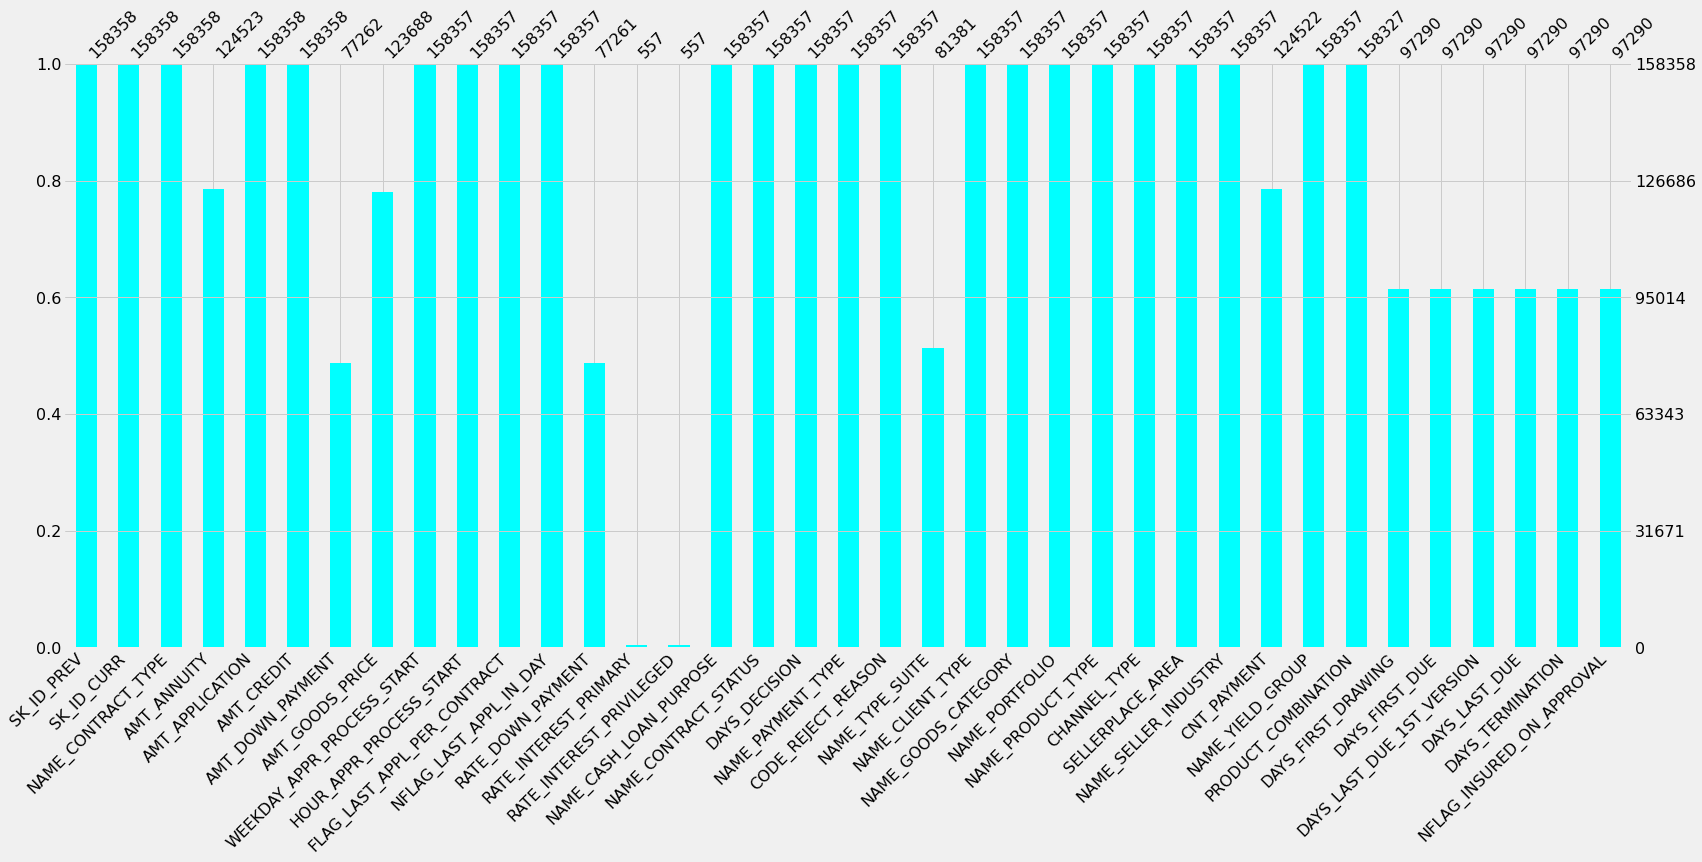

In [ ]:
overview(previous)

This has one row for every previous loan a client had at Home Credit. A client can have multiple previous loans which is why we need to aggregate statistics for each client.

In [ ]:
# to clean up my dataset, I adopt the method to Keep only columns where 50% or 
# more valid data is available

previous = previous.dropna(how='any', axis=1, thresh=previous.shape[0]*0.50)
previous.shape

(158358, 33)

In [ ]:
data_previous_application = convert_types(previous, print_info=True)
data_previous_application.head()

Original Memory Usage: 0.04 gb.
New Memory Usage: 0.01 gb.


SK_ID_PREV  SK_ID_CURR  ... DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877  ...            -37.0                        0.0
1     2802425      108129  ...         365243.0                        1.0
2     2523466      122040  ...         365243.0                        1.0
3     2819243      176158  ...           -177.0                        1.0
4     1784265      202054  ...              NaN                        NaN

[5 rows x 33 columns]

In [ ]:
# Calculate aggregate statistics for each numeric column
previous_agg = agg_numeric(data_previous_application, 'SK_ID_CURR', 'previous')
print('Previous aggregation shape: ', previous_agg.shape)
previous_agg.head()

Previous aggregation shape:  (115093, 76)


SK_ID_CURR  ...  previous_NFLAG_INSURED_ON_APPROVAL_sum
0      100006  ...                                     0.0
1      100007  ...                                     0.0
2      100009  ...                                     0.0
3      100012  ...                                     0.0
4      100013  ...                                     0.0

[5 rows x 76 columns]

In [ ]:
# Calculate value counts for each categorical column
previous_counts = agg_categorical(data_previous_application, 'SK_ID_CURR',
                                  'previous')
print('Previous counts shape: ', previous_counts.shape)
previous_counts.head()

Previous counts shape:  (115093, 280)


previous_NAME_CASH_LOAN_PURPOSE_Money for a third person_sum  ...  previous_NAME_CONTRACT_TYPE_Cash loans_count
SK_ID_CURR                                                                ...                                              
100006                                                      0             ...                                             1
100007                                                      0             ...                                             2
100009                                                      0             ...                                             1
100012                                                      0             ...                                             1
100013                                                      0             ...                                             1

[5 rows x 280 columns]

We can join the calculated dataframe to the main training dataframe using a merge. Then we should delete the calculated dataframes to avoid using too much of the kernel memory.

In [ ]:
df = convert_types(df)

In [ ]:
# Merge in the previous information
df = df.merge(previous_counts, on='SK_ID_CURR', how='left')
df = df.merge(previous_agg, on='SK_ID_CURR', how='left')


# Remove variables to free memory
gc.enable()
del data_previous_application, previous_agg, previous_counts
gc.collect()

302

We are going to have to be careful about calculating too many features. We don't want to overwhelm the model with too many irrelevant features or features with too many missing values.

**Function to Calculate Missing Values**

In [ ]:
# Function to calculate missing values by column 
def missing_values_table(df, print_info=False):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] !=0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        if print_info:
            # Print some summary information
            print ("Your selected dataframe has " + str(df.shape[1]) + " column\
            s.\n"      
                "There are " + str(mis_val_table_ren_columns.shape[0]) +
                  " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
def remove_missing_columns(df, threshold = 90):
    # Calculate missing stats for df (remember to calculate a percent!)
    df_miss = pd.DataFrame(df.isnull().sum())
    df_miss['percent'] = 100 * df_miss[0] / len(df)
    
    # list of missing columns for dft
    missing_df_columns = list(df_miss.index[df_miss['percent'] > threshold])
    
    # Print information
    print('There are %d columns with greater than %d%% missing values.'\
          % (len(missing_df_columns), threshold))
    
    # Drop the missing columns and return
    df = df.drop(columns = missing_df_columns)
    
    
    return df

In [ ]:
df = remove_missing_columns(df)

There are 0 columns with greater than 90% missing values.


**Function to Aggregate Stats at the Client Level**

In [ ]:
def aggregate_client(df, group_vars, df_names):
    """Aggregate a dataframe with data at the loan level 
    at the client level
    
    Args:
        df (dataframe): data at the loan level
        group_vars (list of two strings): grouping variables for the loan 
        and then the client (example ['SK_ID_PREV', 'SK_ID_CURR'])
        names (list of two strings): names to call the resulting columns
        (example ['cash', 'client'])
        
    Returns:
        df_client (dataframe): aggregated numeric stats at the client level. 
        Each client will have a single row with all the numeric data aggregated
    """
    
    # Aggregate the numeric columns
    df_agg = agg_numeric(df, parent_var=group_vars[0], df_name=df_names[0])
    
    # If there are categorical variables
    if any(df.dtypes == 'category'):
    
        # Count the categorical columns
        df_counts = agg_categorical(df, parent_var=group_vars[0],
                                    df_name=df_names[0])

        # Merge the numeric and categorical
        df_by_loan = df_counts.merge(df_agg, on=group_vars[0], how='outer')

        gc.enable()
        del df_agg, df_counts
        gc.collect()

        # Merge to get the client id in dataframe
        df_by_loan = df_by_loan.merge(df[[group_vars[0], group_vars[1]]],
                                      on=group_vars[0], how='left')

        # Remove the loan id
        df_by_loan = df_by_loan.drop(columns = [group_vars[0]])

        # Aggregate numeric stats by column
        df_by_client = agg_numeric(df_by_loan, parent_var=group_vars[1], 
                                   df_name=df_names[1])

        
    # No categorical variables
    else:
        # Merge to get the client id in dataframe
        df_by_loan = df_agg.merge(df[[group_vars[0], group_vars[1]]],
                                  on=group_vars[0], how='left')
        
        gc.enable()
        del df_agg
        gc.collect()
        
        # Remove the loan id
        df_by_loan = df_by_loan.drop(columns=[group_vars[0]])
        
        # Aggregate numeric stats by column
        df_by_client = agg_numeric(df_by_loan, parent_var=group_vars[1], 
                                   df_name=df_names[1])
        
    # Memory management
    gc.enable()
    del df, df_by_loan
    gc.collect()

    return df_by_client

___

**3.5. Monthly Cash Data**

In [ ]:
overview(cash)

Shape of the dataframe is: (1013702, 8)
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013702 entries, 0 to 1013701
Data columns (total 8 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   SK_ID_PREV             1013702 non-null  int64  
 1   SK_ID_CURR             1013702 non-null  int64  
 2   MONTHS_BALANCE         1013702 non-null  int64  
 3   CNT_INSTALMENT         1011856 non-null  float64
 4   CNT_INSTALMENT_FUTURE  1011856 non-null  float64
 5   NAME_CONTRACT_STATUS   1013701 non-null  object 
 6   SK_DPD                 1013701 non-null  float64
 7   SK_DPD_DEF             1013701 non-null  float64
dtypes: float64(4), int64(3), object(1)
memory usage: 61.9+ MB
Information about features:  None
************************************************************
Total number of null values: 
  SK_ID_PREV                  0
SK_ID_CURR                 

SK_ID_PREV  SK_ID_CURR  ...  SK_DPD  SK_DPD_DEF
0     1803195      182943  ...     0.0         0.0
1     1715348      367990  ...     0.0         0.0

[2 rows x 8 columns]

In [ ]:
# to clean up my dataset, I adopt the method to Keep only rows where 80% or 
# more valid data is available

cash = cash.dropna(how='any', axis=0, thresh=cash.shape[1]*0.80)
cash.shape

(1011858, 8)

In [ ]:
cash = convert_types(cash, print_info=True)
cash.head(3)

Original Memory Usage: 0.07 gb.
New Memory Usage: 0.04 gb.


SK_ID_PREV  SK_ID_CURR  ...  SK_DPD  SK_DPD_DEF
0     1803195      182943  ...     0.0         0.0
1     1715348      367990  ...     0.0         0.0
2     1784872      397406  ...     0.0         0.0

[3 rows x 8 columns]

In [ ]:
cash_by_client = aggregate_client(cash, group_vars=['SK_ID_PREV',
                                                    'SK_ID_CURR'], 
                                  df_names=['cash', 'client'])
cash_by_client.head(3)

In [ ]:
print('Cash by Client Shape: ', cash.shape)
df = df.merge(cash, on='SK_ID_CURR', how='left')

gc.enable()
del cash, cash_by_client
gc.collect()

Cash by Client Shape:  (1013702, 8)


NameError: ignored

In [ ]:
df = remove_missing_columns(df)

There are 0 columns with greater than 60% missing values.


**3.6. Monthly Credit Data**

Shape of the dataframe is: (773803, 23)
************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773803 entries, 0 to 773802
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_PREV                  773803 non-null  int64  
 1   SK_ID_CURR                  773803 non-null  int64  
 2   MONTHS_BALANCE              773803 non-null  int64  
 3   AMT_BALANCE                 773803 non-null  float64
 4   AMT_CREDIT_LIMIT_ACTUAL     773803 non-null  int64  
 5   AMT_DRAWINGS_ATM_CURRENT    614743 non-null  float64
 6   AMT_DRAWINGS_CURRENT        773803 non-null  float64
 7   AMT_DRAWINGS_OTHER_CURRENT  614743 non-null  float64
 8   AMT_DRAWINGS_POS_CURRENT    614743 non-null  float64
 9   AMT_INST_MIN_REGULARITY     717246 non-null  float64
 10  AMT_PAYMENT_CURRENT         612045 non-null  float64
 11  AMT_PAYMENT_TOTAL_CURRENT   7

SK_ID_PREV  SK_ID_CURR  ...  SK_DPD  SK_DPD_DEF
0     2562384      378907  ...     0.0         0.0
1     2582071      363914  ...     0.0         0.0

[2 rows x 23 columns]

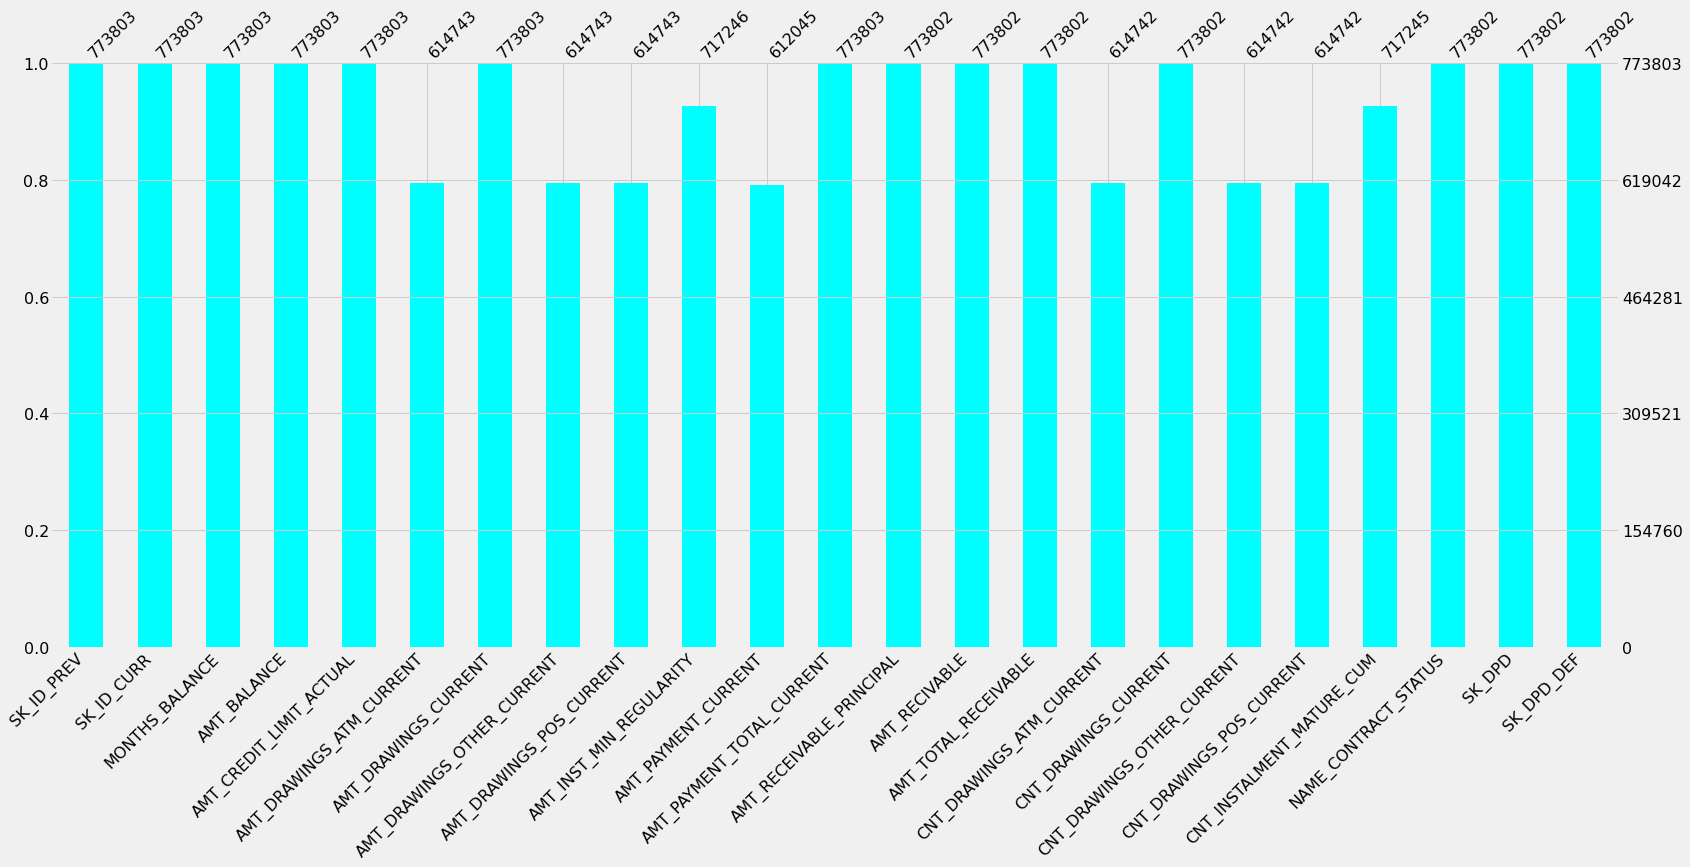

In [ ]:
overview(credit_card)

In [ ]:
credit_card = convert_types(credit_card, print_info=True)
credit_card.head()

Original Memory Usage: 0.14 gb.
New Memory Usage: 0.07 gb.


SK_ID_PREV  SK_ID_CURR  ...  SK_DPD  SK_DPD_DEF
0     2562384      378907  ...     0.0         0.0
1     2582071      363914  ...     0.0         0.0
2     1740877      371185  ...     0.0         0.0
3     1389973      337855  ...     0.0         0.0
4     1891521      126868  ...     0.0         0.0

[5 rows x 23 columns]

In [ ]:
credit_by_client = aggregate_client(credit_card, group_vars = ['SK_ID_PREV',\
                                                               'SK_ID_CURR'],
                                    df_names = ['credit', 'client'])
credit_by_client.head()

TypeError: ignored

In [ ]:
print('Credit by client shape: ', credit_by_client.shape)

df = df.merge(credit_by_client, on='SK_ID_CURR', how='left')

gc.enable()
del credit_card, credit_by_client
gc.collect()

Credit by client shape:  (95704, 394)


0

In [ ]:
df = remove_missing_columns(df)

There are 0 columns with greater than 90% missing values.


**Installment Payments**

In [ ]:
installments = convert_types(installments, print_info = True)
installments.head()

Original Memory Usage: 0.05 gb.
New Memory Usage: 0.02 gb.


SK_ID_PREV  SK_ID_CURR  ...  AMT_INSTALMENT   AMT_PAYMENT
0     1054186      161674  ...     6948.359863   6948.359863
1     1330831      151639  ...     1716.525024   1716.525024
2     2085231      193053  ...    25425.000000  25425.000000
3     2452527      199697  ...    24350.130859  24350.130859
4     2714724      167756  ...     2165.040039   2160.584961

[5 rows x 8 columns]

In [ ]:
installments_by_client = aggregate_client(installments, group_vars=['SK_ID_PR\
EV', 'SK_ID_CURR'], df_names=['installments', 'client'])
installments_by_client.head()

TypeError: ignored

In [ ]:
print('Installments by client shape: ', installments_by_client.shape)

df = df.merge(installments_by_client, on='SK_ID_CURR', how='left')

gc.enable()
del installments, installments_by_client
gc.collect()

In [ ]:
df = remove_missing_columns(df)

**Polynomial Features**

One simple feature construction method is called polynomial features. In this method, we make features that are powers of existing features as well as interaction terms between existing features. For example, we can create variables EXT_SOURCE_1^2 and EXT_SOURCE_2^2 and also variables such as EXT_SOURCE_1 x EXT_SOURCE_2, EXT_SOURCE_1 x EXT_SOURCE_2^2, EXT_SOURCE_1^2 x EXT_SOURCE_2^2, and so on. These features that are a combination of multiple individual variables are called interaction terms because they capture the interactions between variables. In other words, while two variables by themselves may not have a strong influence on the target, combining them together into a single interaction variable might show a relationship with the target. Interaction terms are commonly used in statistical models to capture the effects of multiple variables, but I do not see them used as often in machine learning. Nonetheless, we can try out a few to see if they might help our model to predict whether or not a client will repay a loan.

Jake VanderPlas writes about polynomial features in his excellent book Python for Data Science for those who want more information.

In the following code, we create polynomial features using the EXT_SOURCE variables and the DAYS_BIRTH variable. Scikit-Learn has a useful class called PolynomialFeatures that creates the polynomials and the interaction terms up to a specified degree. We can use a degree of 3 to see the results (when we are creating polynomial features, we want to avoid using too high of a degree, both because the number of features scales exponentially with the degree, and because we can run into problems with overfitting).

In [ ]:
# Make a new dataframe for polynomial features
poly_features = df[['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]

# imputer for handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns=['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree=3)

In [ ]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (356255, 20)


This creates a considerable number of new features. To get the names we have to use the polynomial features get_feature_names method.

In [ ]:
poly_transformer.get_feature_names(input_features=['EXT_SOURCE_2', 
                                                   'EXT_SOURCE_3', 
                                                   'DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2',
 'EXT_SOURCE_2^3',
 'EXT_SOURCE_2^2 EXT_SOURCE_3',
 'EXT_SOURCE_2^2 DAYS_BIRTH',
 'EXT_SOURCE_2 EXT_SOURCE_3^2',
 'EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH']

There are 35 features with individual features raised to powers up to degree 3 and interaction terms. Now, we can see whether any of these new features are correlated with the target.

In [ ]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names([
                            'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target

poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3     -0.193969
EXT_SOURCE_2^2 EXT_SOURCE_3   -0.176446
EXT_SOURCE_2 EXT_SOURCE_3^2   -0.172255
EXT_SOURCE_2                  -0.160295
EXT_SOURCE_3                  -0.156019
EXT_SOURCE_2^2                -0.149512
EXT_SOURCE_3^2                -0.141744
EXT_SOURCE_2^3                -0.140243
EXT_SOURCE_2 DAYS_BIRTH^2     -0.132839
EXT_SOURCE_3^3                -0.128255
Name: TARGET, dtype: float64
EXT_SOURCE_3 DAYS_BIRTH                 0.150178
EXT_SOURCE_2 DAYS_BIRTH                 0.156873
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH    0.181299
TARGET                                  1.000000
1                                            NaN
Name: TARGET, dtype: float64


Several of the new variables have a greater (in terms of absolute magnitude) correlation with the target than the original features. When we build machine learning models, we can try with and without these features to determine if they actually help the model learn.

We will add these features to a copy of the training and testing data and then evaluate models with and without the features. Many times in machine learning, the only way to know if an approach will work is to try it out!

In [ ]:
# Merge polynomial features into the dataframe
poly_features['SK_ID_CURR'] = df['SK_ID_CURR']
data_df_poly = df.merge(poly_features, on='SK_ID_CURR', how='left')

# Print out the new shapes
print('Data with polynomial features shape: ', data_df_poly.shape)

Data with polynomial features shape:  (356255, 939)


**Domain Knowledge Features**

Maybe it's not entirely correct to call this "domain knowledge" because I'm not a credit expert, but perhaps we could call this "attempts at applying limited financial knowledge". In this frame of mind, we can make a couple features that attempt to capture what we think may be important for telling whether a client will default on a loan. Here I'm going to use five features that were inspired by this script by Aguiar:

CREDIT_INCOME_PERCENT: the percentage of the credit amount relative to a client's income
ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income
CREDIT_TERM: the length of the payment in months (since the annuity is the monthly amount due
DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age
Again, thanks to Aguiar and his great script for exploring these features.

In [ ]:
df_domain = data_df_poly.copy()

df_domain['CREDIT_INCOME_PERCENT'] = df_domain['AMT_CREDIT'] / df_domain['AMT_I\
NCOME_TOTAL']
df_domain['ANNUITY_INCOME_PERCENT'] = df_domain['AMT_ANNUITY'] / df_domain['AMT\
_INCOME_TOTAL']
df_domain['CREDIT_TERM'] = df_domain['AMT_ANNUITY'] / df_domain['AMT_CREDIT']
df_domain['DAYS_EMPLOYED_PERCENT'] = df_domain['DAYS_EMPLOYED'] / df_domain['DA\
YS_BIRTH']

In [ ]:
del df

**Visualize New Variables**

We should explore these domain knowledge variables visually in a graph. For all of these, we will make the same KDE plot colored by the value of the TARGET.

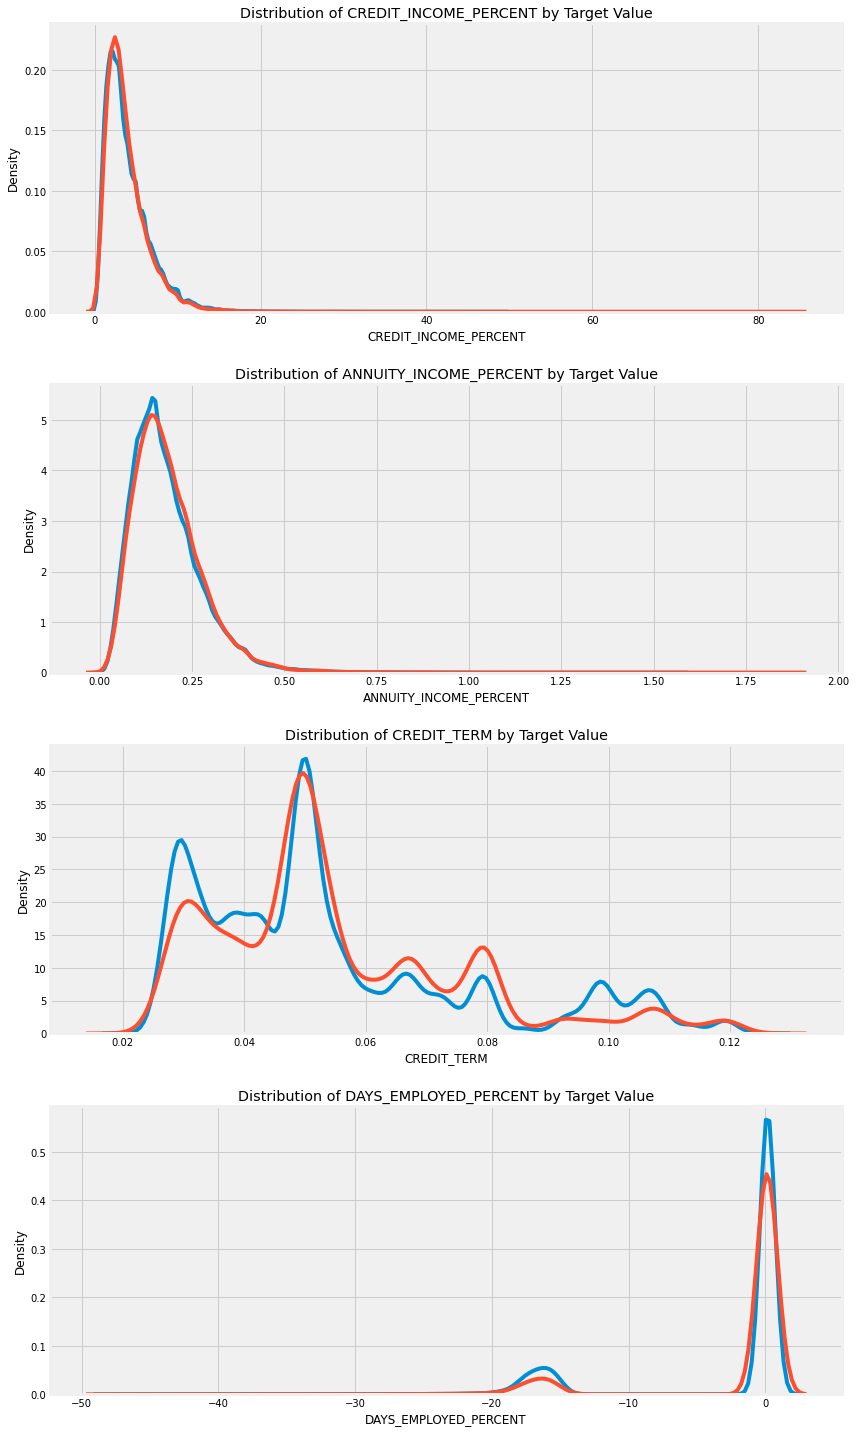

In [ ]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT',
                             'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(df_domain.loc[df_domain['TARGET'] == 0, feature], 
                label='target == 0')
    # plot loans that were not repaid
    sns.kdeplot(df_domain.loc[df_domain['TARGET'] == 1, feature],
                label='target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

It's hard to say ahead of time if these new features will be useful. The only way to tell for sure is to try them out!

In [ ]:
print('Final df Shape: ', df_domain.shape)

Final df Shape:  (356255, 1351)


In [ ]:
df_domain.to_csv('df_P7.csv', index = False)